## 🔬 Control Dataset Overview

This notebook analyzes spontaneous calcium activity in BxPC3 pancreatic cancer cells imaged under identical control conditions across six image sequences.

**Experimental context:**
- Cell line: BxPC3 (pancreatic ductal adenocarcinoma)
- Imaging: DIV2, seeded at 1.2 million cells per well (high confluence)
- Ca²⁺ dye: Fluo-4 AM (standard loading protocol)
- Nuclei: Hoechst 33342 (10 µg/mL)
- Acquisition: FITC, 1 Hz, 30 ms exposure for 30 minutes

This is the **first run** of spontaneous activity under control conditions. The goal is to assess the **reproducibility** and **biological variability** of peak-, cell-, and event-level metrics across replicates.

## ⚙️ Setup & Utilities

Standard scientific libraries (Pandas, NumPy, Seaborn) and custom plotting utilities are loaded. These functions enable streamlined metric visualization and layout control across multiple datasets.

In [ ]:
# Libraries
import seaborn as sns
import numpy as np
from pathlib import Path
import sys

# Add /Source to sys.path if not already present
project_root = Path.cwd().parent
source_path = project_root / "src"

if source_path.exists() and str(source_path) not in sys.path:
    sys.path.insert(0, str(source_path))

# Utility functions
from calcium_activity_characterization.analysis.visualizers import (
    plot_histogram_by_dataset, 
    plot_pie_chart_by_dataset, 
    visualize_image,
    plot_bar_by_dataset,
    plot_histogram_by_group
    )
from calcium_activity_characterization.analysis.loaders import load_and_merge_datasets

sns.set(style="whitegrid")

# Define paths to control datasets
control_paths = {
    "20250326 - IS1": "D:/Mateo/20250326/Output/IS1",
    "20250326 - IS3": "D:/Mateo/20250326/Output/IS3",
    "20250404 - IS1": "D:/Mateo/20250404/Output/IS1",
    "20250404 - IS3": "D:/Mateo/20250404/Output/IS3",
    "20250409 - IS09": "D:/Mateo/20250409/Output/IS09",
    "20250409 - IS11": "D:/Mateo/20250409/Output/IS11",
    "20250624 - IS01": "D:/Mateo/20250624/Output/IS01",
    "20250624 - IS03": "D:/Mateo/20250624/Output/IS03",
    "20250701 - IS1": "D:/Mateo/20250701/Output/IS1",
}

# Load and merge datasets
peaks = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/peaks.csv")
cells = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/cells.csv")
events = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/events.csv")

## 🧼 Preprocessing

Before visual comparison, we normalize event labels (e.g., missing `in_event` entries set to `'individual'`) and compute additional derived fields (`is_active`, `periodicity_score`) to ensure consistent comparisons across all datasets.

These steps are crucial for **ensuring fair metric aggregation** and enabling downstream comparative analysis.

In [2]:
peaks["in_event"] = peaks["in_event"].fillna("individual").str.lower()

if "is_active" not in cells.columns:
    cells["is_active"] = cells["num_peaks"].apply(lambda x: 1 if x > 0 else 0)

if "periodicity_score" not in cells.columns:
    cells["periodicity_score"] = np.nan

### 📈 Cell Count per Dataset

The number of segmented cells per dataset provides a proxy for cell density.

*Interpretation:*
- todo

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:218: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="dataset", y=value_column, hue=hue_column, dodge=False, palette=palette)


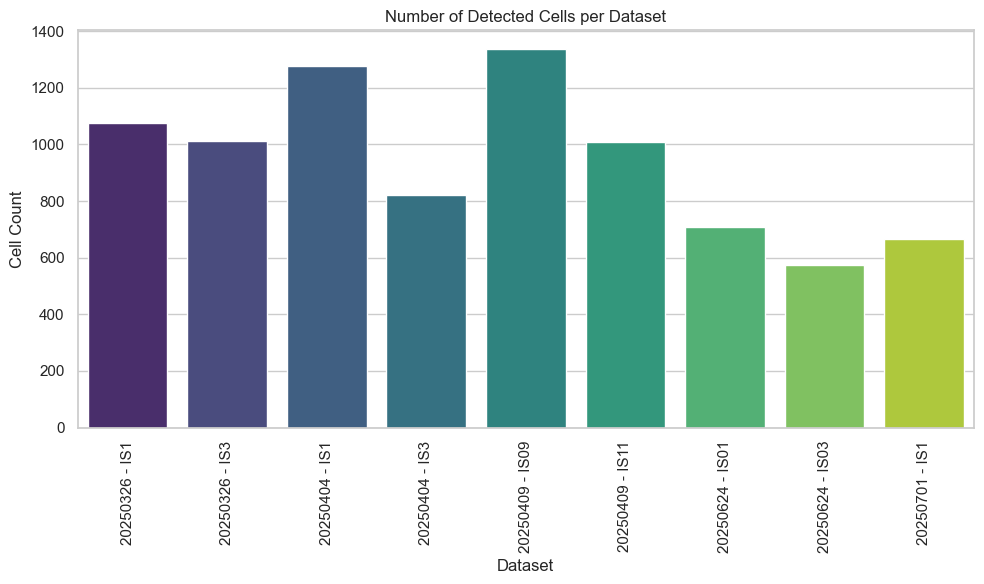

In [3]:
# Count number of cells per dataset
cell_counts = cells.groupby("dataset").size().reset_index(name="num_cells")

plot_bar_by_dataset(
    df=cell_counts,
    value_column="num_cells",
    title="Number of Detected Cells per Dataset",
    xlabel="Dataset",
    ylabel="Cell Count",
    palette="viridis",
    rotation=90
    )

## 🖼️ Raster Plot Inspection

Raster plots provide a binary overview of calcium activity over time per cell.

*Remarks:* 
*TODO*

📌 Use these plots to **screen visually for anomalies or batch effects** before statistical analysis.

In [4]:
event_summary = (
    events.groupby(["dataset", "event_type"])
    .size()
    .unstack(fill_value=0)[["GlobalEvent", "SequentialEvent"]]
    .reset_index()
)

for _, row in event_summary.iterrows():
    print(f"📁 {row['dataset']}")
    print(f"  🌐 Number of GLOBAL events: {row['GlobalEvent']}")
    print(f"  ➡️ Number of SEQUENTIAL events: {row['SequentialEvent']}\n")

📁 20250326 - IS1
  🌐 Number of GLOBAL events: 5
  ➡️ Number of SEQUENTIAL events: 1244

📁 20250326 - IS3
  🌐 Number of GLOBAL events: 4
  ➡️ Number of SEQUENTIAL events: 1370

📁 20250404 - IS1
  🌐 Number of GLOBAL events: 5
  ➡️ Number of SEQUENTIAL events: 958

📁 20250404 - IS3
  🌐 Number of GLOBAL events: 2
  ➡️ Number of SEQUENTIAL events: 795

📁 20250409 - IS09
  🌐 Number of GLOBAL events: 4
  ➡️ Number of SEQUENTIAL events: 1056

📁 20250409 - IS11
  🌐 Number of GLOBAL events: 5
  ➡️ Number of SEQUENTIAL events: 419

📁 20250624 - IS01
  🌐 Number of GLOBAL events: 3
  ➡️ Number of SEQUENTIAL events: 462

📁 20250624 - IS03
  🌐 Number of GLOBAL events: 2
  ➡️ Number of SEQUENTIAL events: 669

📁 20250701 - IS1
  🌐 Number of GLOBAL events: 3
  ➡️ Number of SEQUENTIAL events: 792



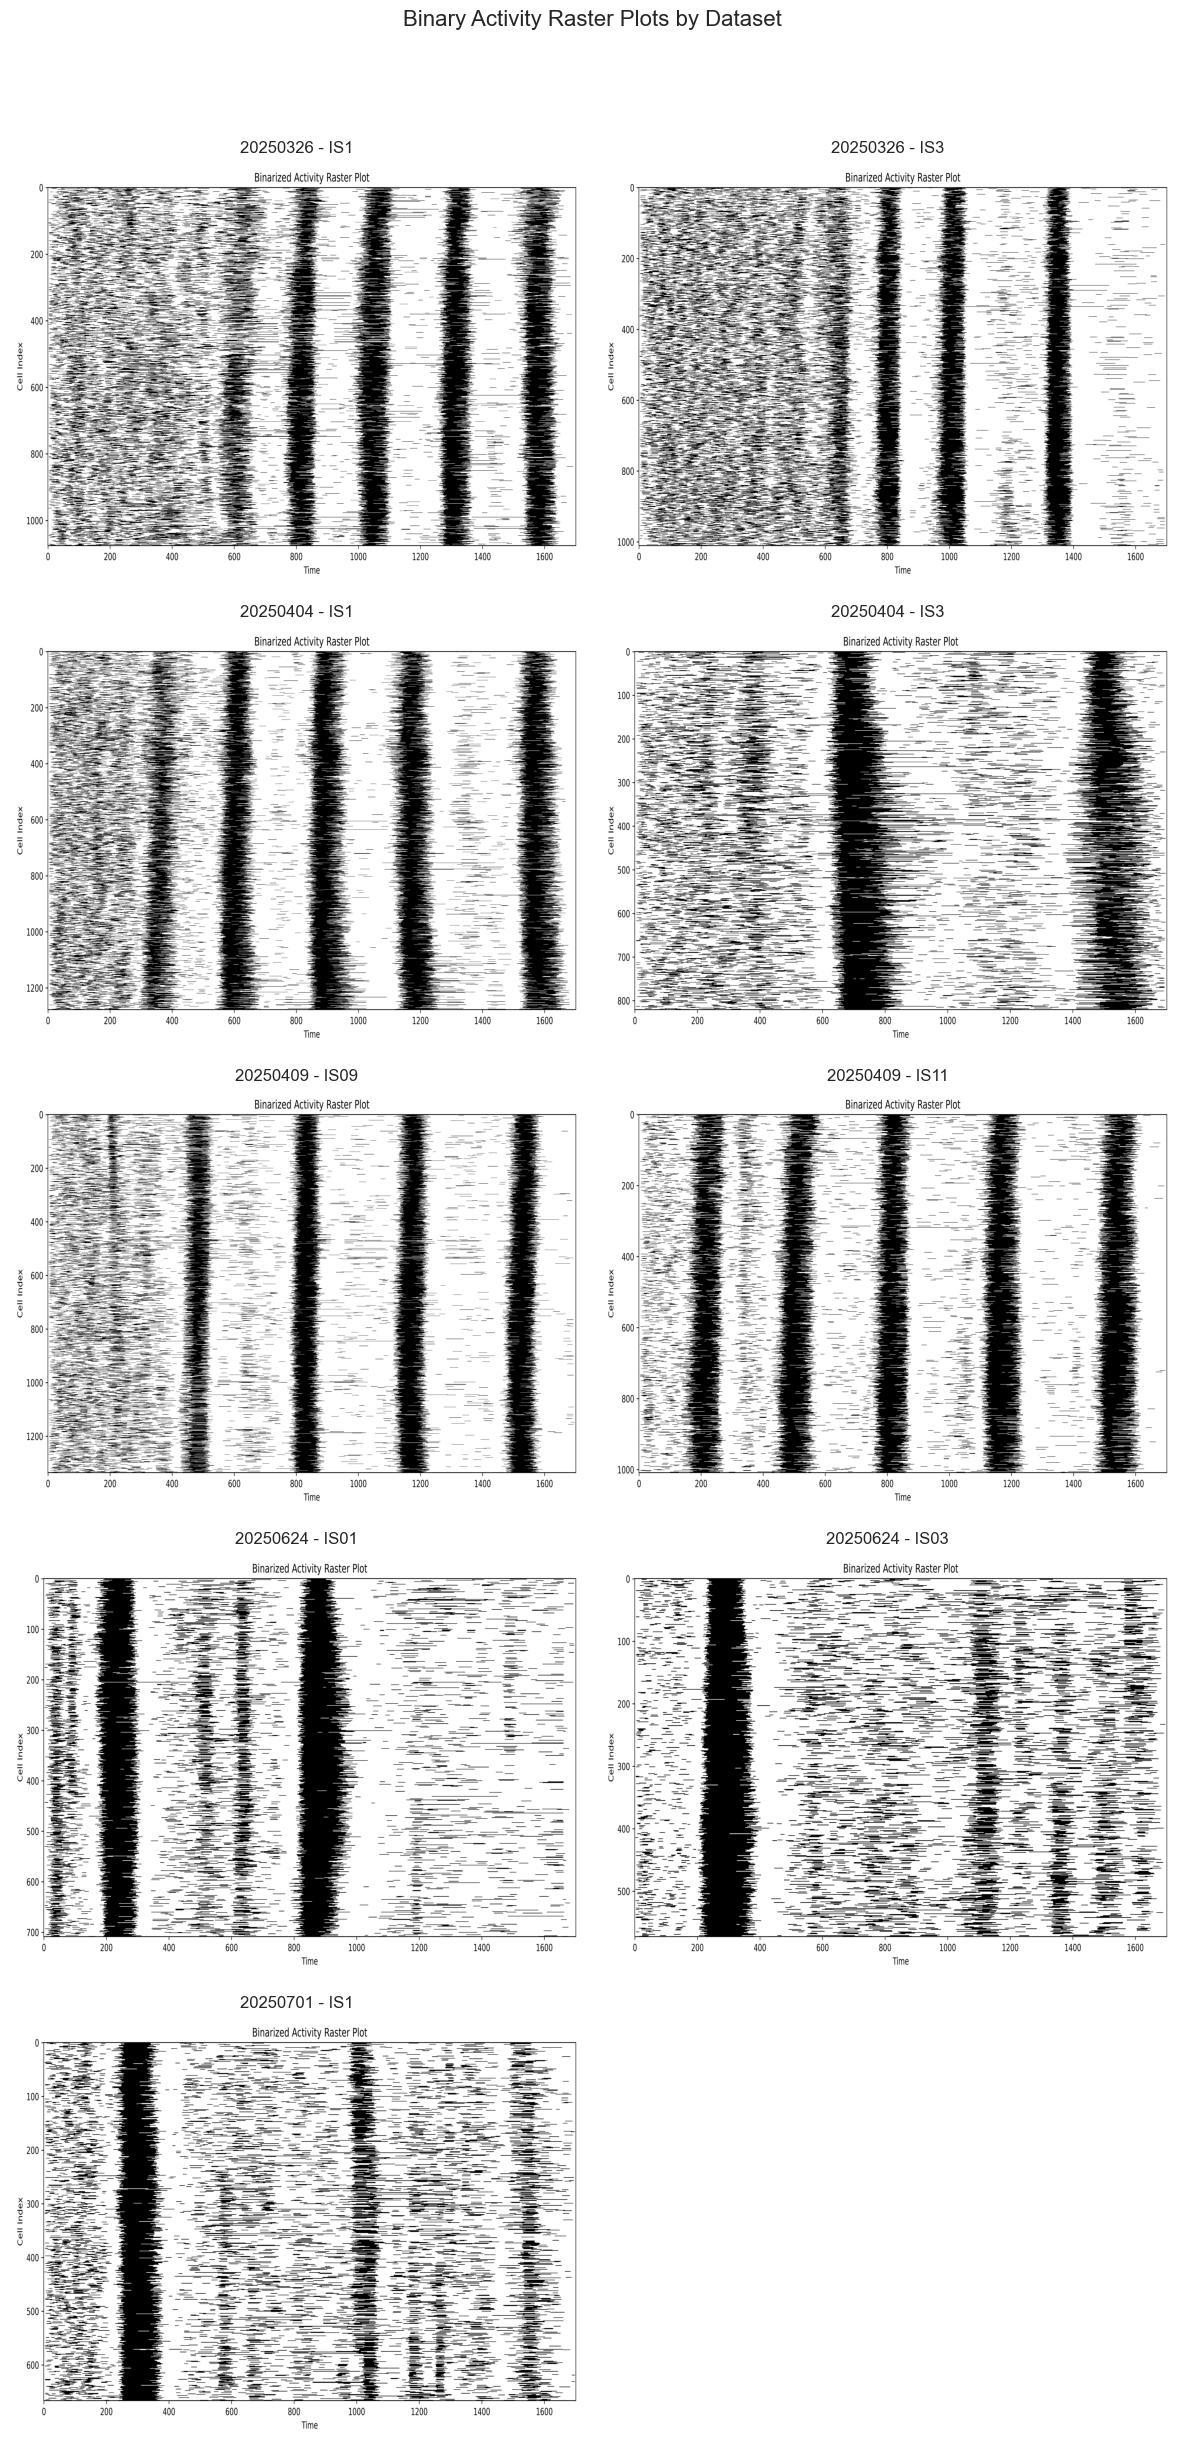

In [ ]:
visualize_image(
    dataset_paths=control_paths,
    title="Binary Activity Raster Plots by Dataset"
)

## 📊 Peak Type Distribution

Pie charts quantify the proportion of detected calcium peaks classified as:
- `individual`: isolated peaks
- `sequential`: propagating local events
- `global`: large-scale synchronized events

*Interpretation:*

*The distribution of peaks by event type (global, sequential, individual) across First Run control datasets is highly consistent.*

- *Approximately **30-40% global events** are consistently observed, except in image sequence `2025-04-04 IS3`, where fewer global events were detected.*

- *Sequential and individual peaks maintain stable proportions across datasets, indicating reproducible spontaneous calcium signaling activity under standard conditions.*

*First run image sequences demonstrate reproducible and robust peak-type distribution, validating their reliability as control data.*

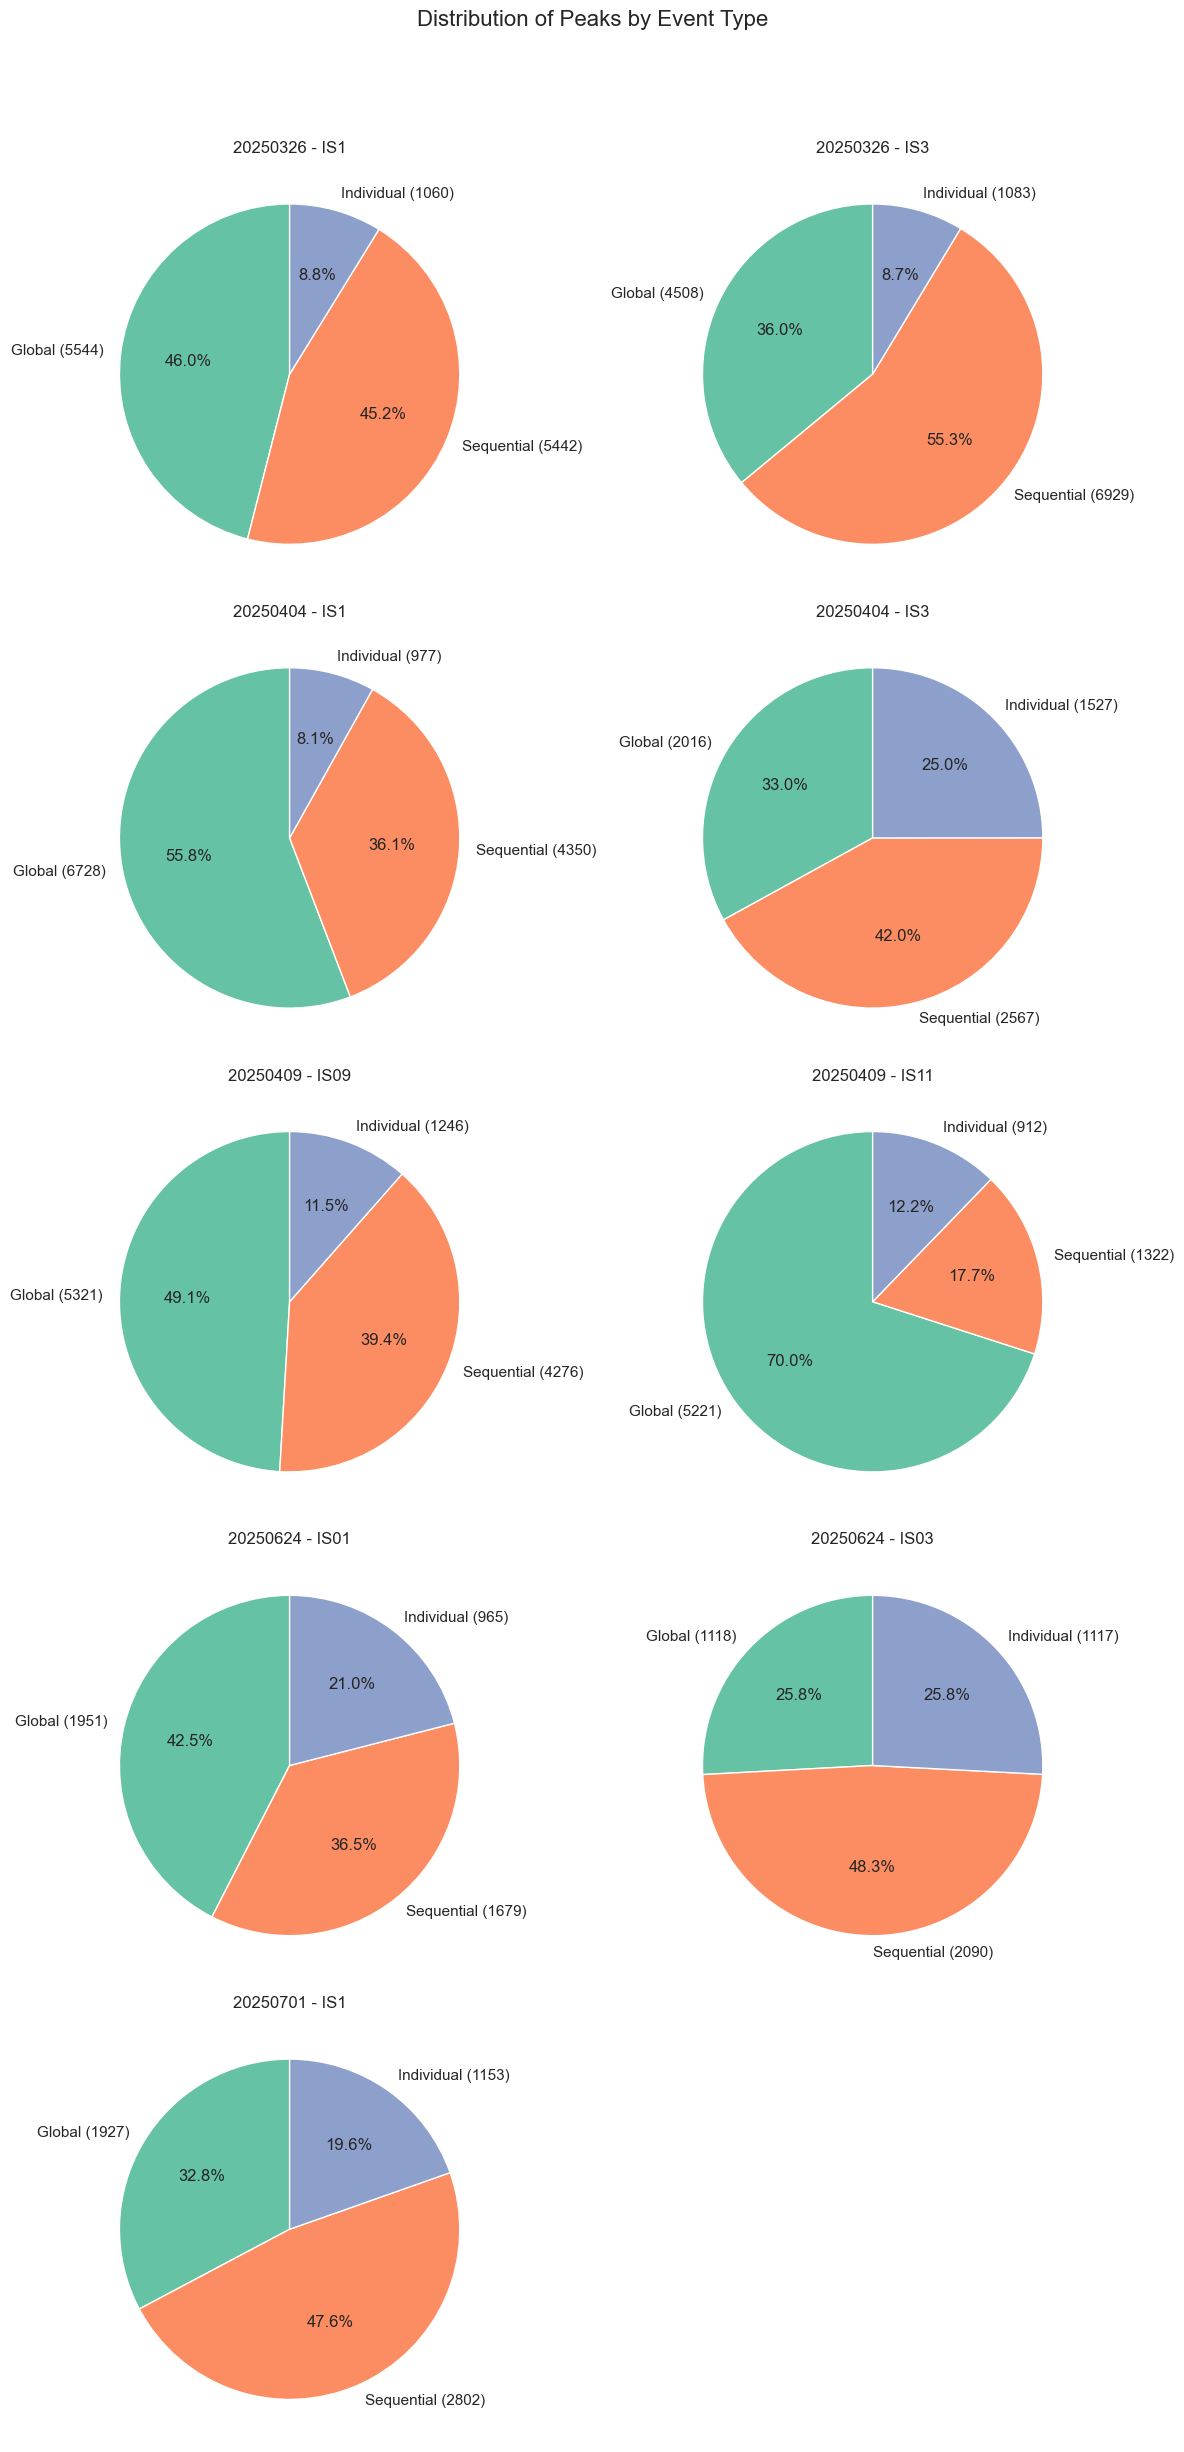

In [6]:
peak_type_colors = {
    "global": "#66c2a5",
    "sequential": "#fc8d62",
    "individual": "#8da0cb"
}

plot_pie_chart_by_dataset(
    df=peaks,
    column="in_event",
    category_order=["global", "sequential", "individual"],
    colors=peak_type_colors,
    title="Distribution of Peaks by Event Type"
)

## 📈 Peak Metrics per Event Type

Metrics like **duration**, **prominence**, and **symmetry** are visualized per event type.  

*Interpretation:*

- *Global peaks: Characteristically long durations (~50 frames).*

- *Sequential peaks: Duration means around **26–28 frames**; symmetry values around **0.9 ± 0.12**.*

- *Individual peaks: Duration around **26–27 frames**, also with symmetry ~0.9 ± 0.12.*

*Overall, the peak metrics in the First Run are stable, biologically plausible, and reproducible.*

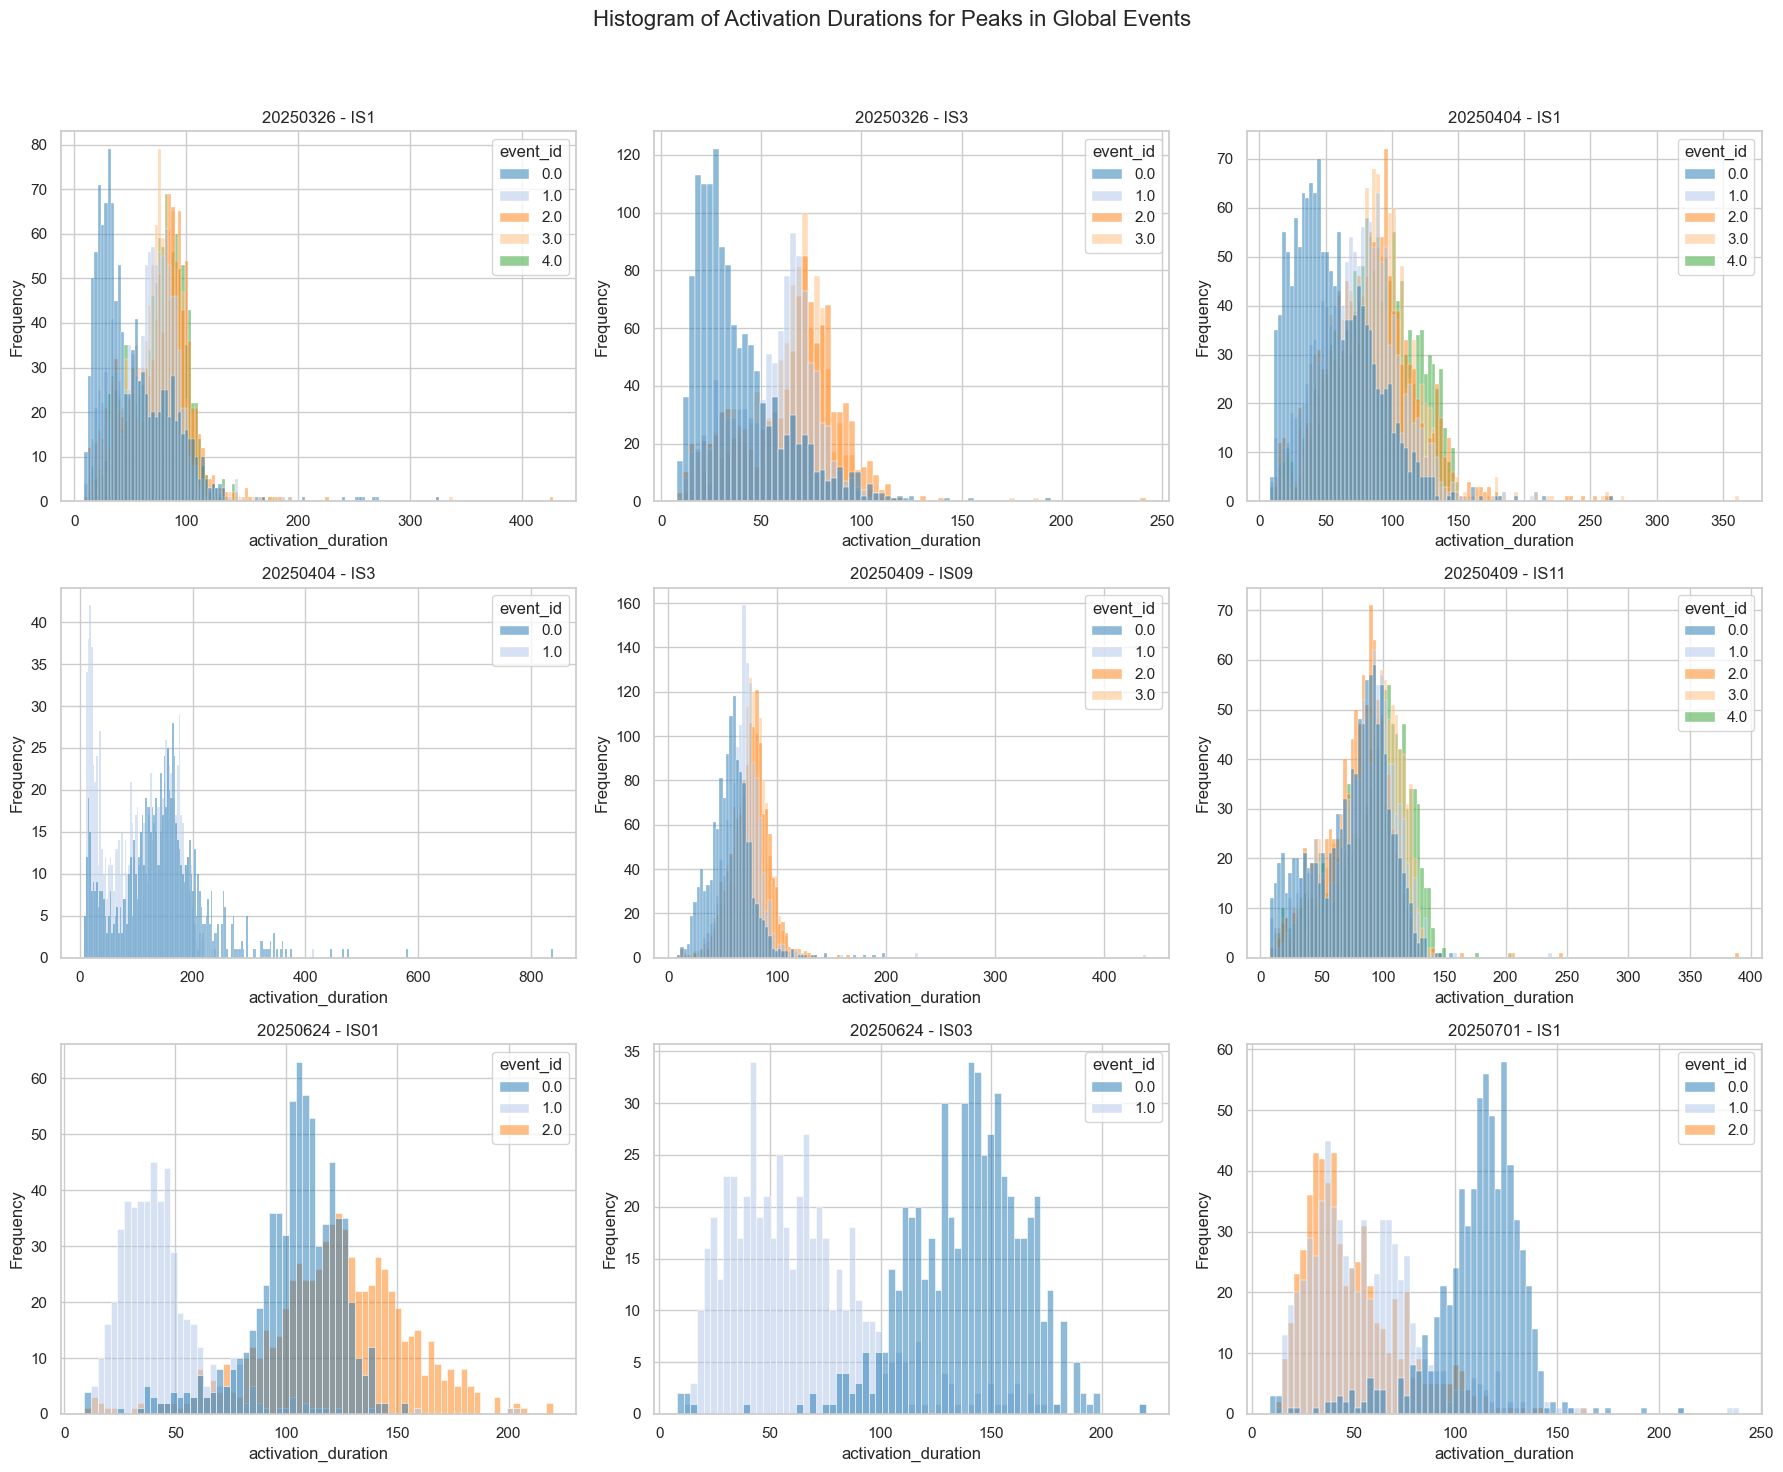

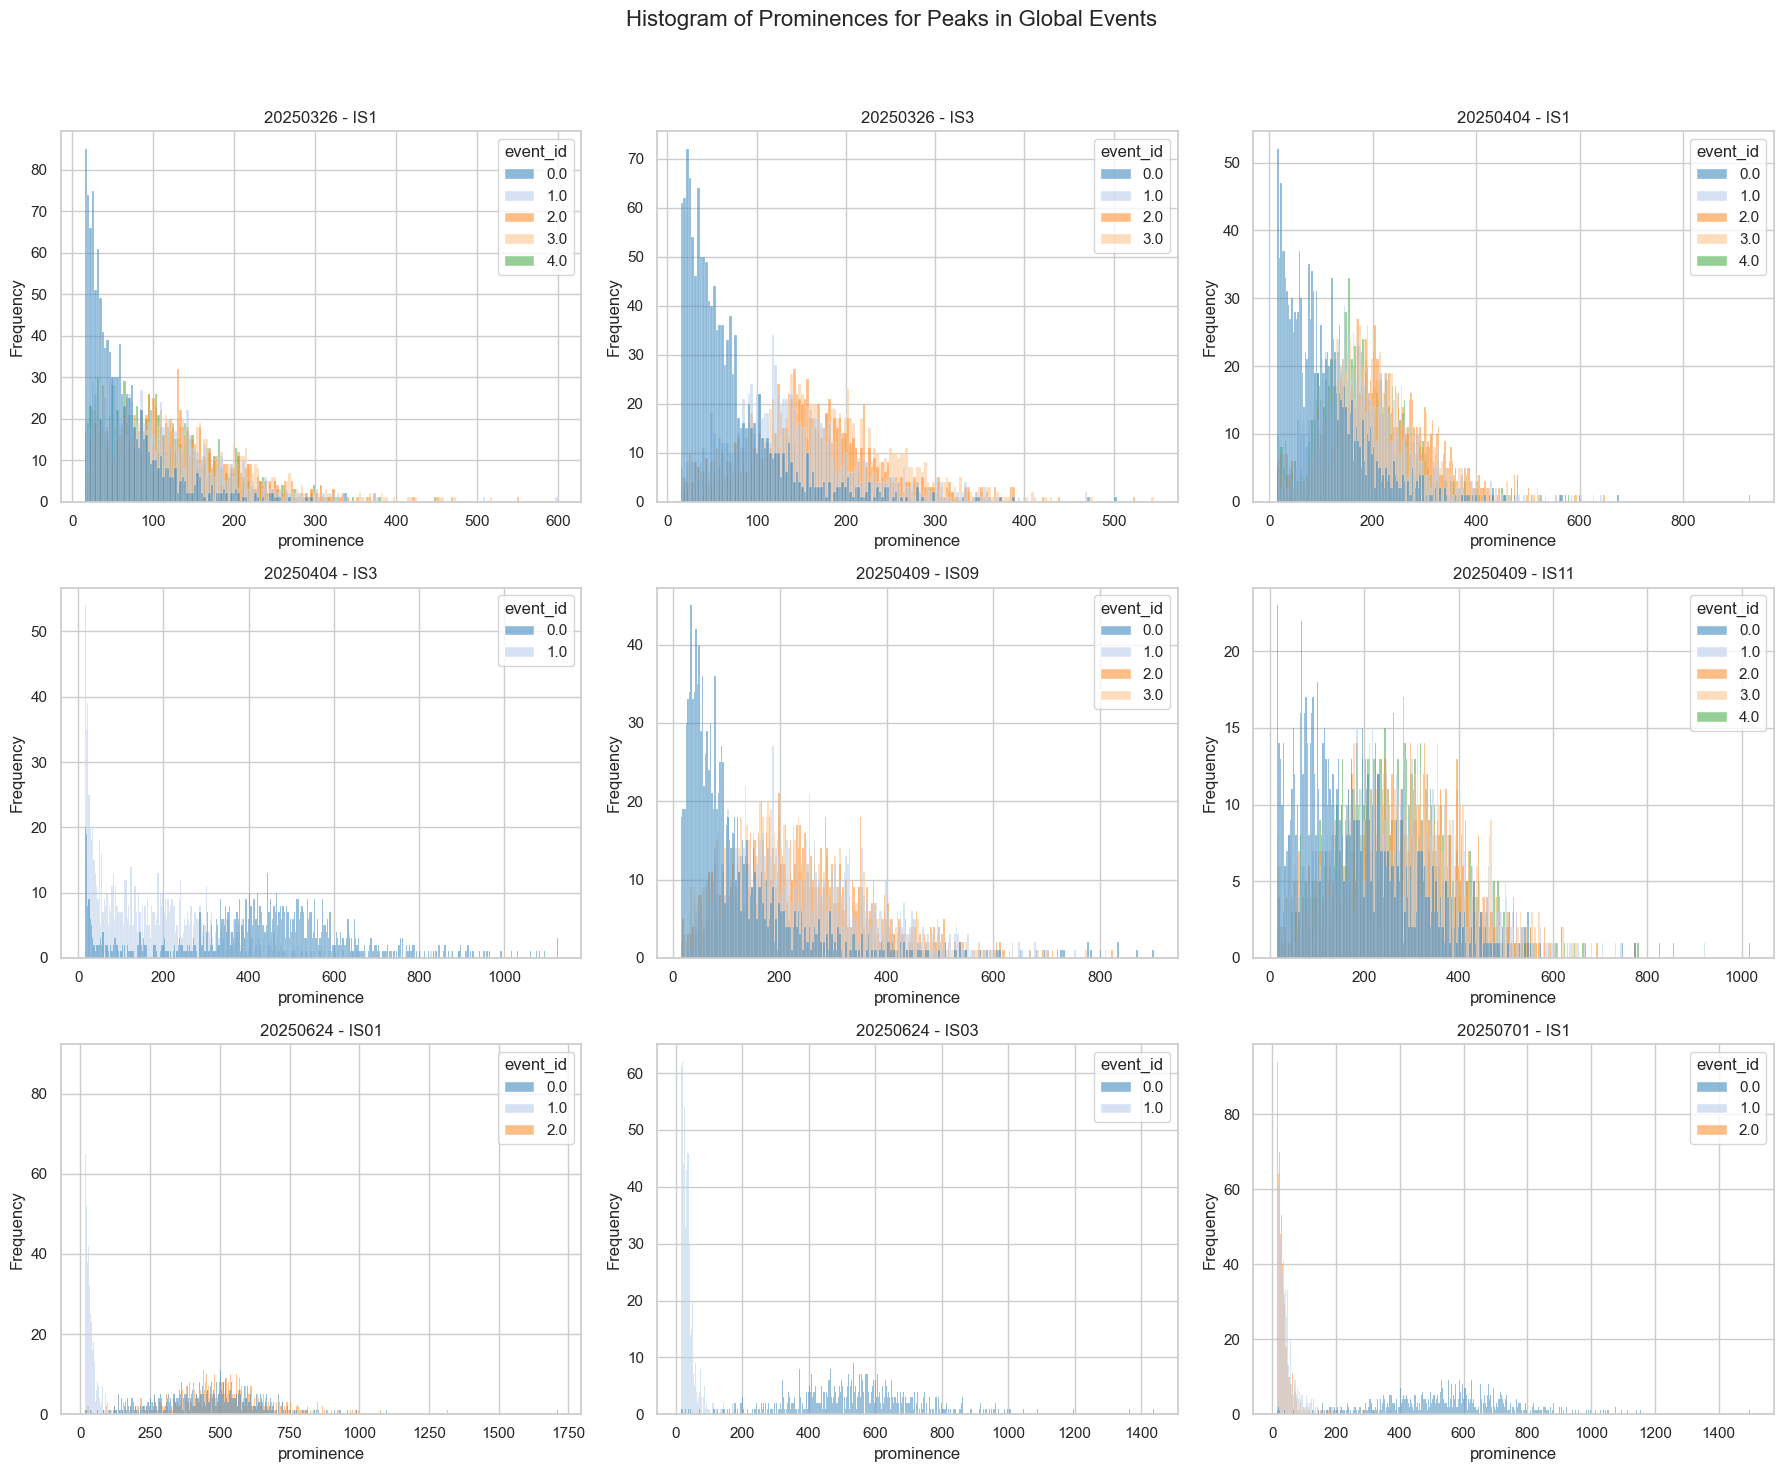

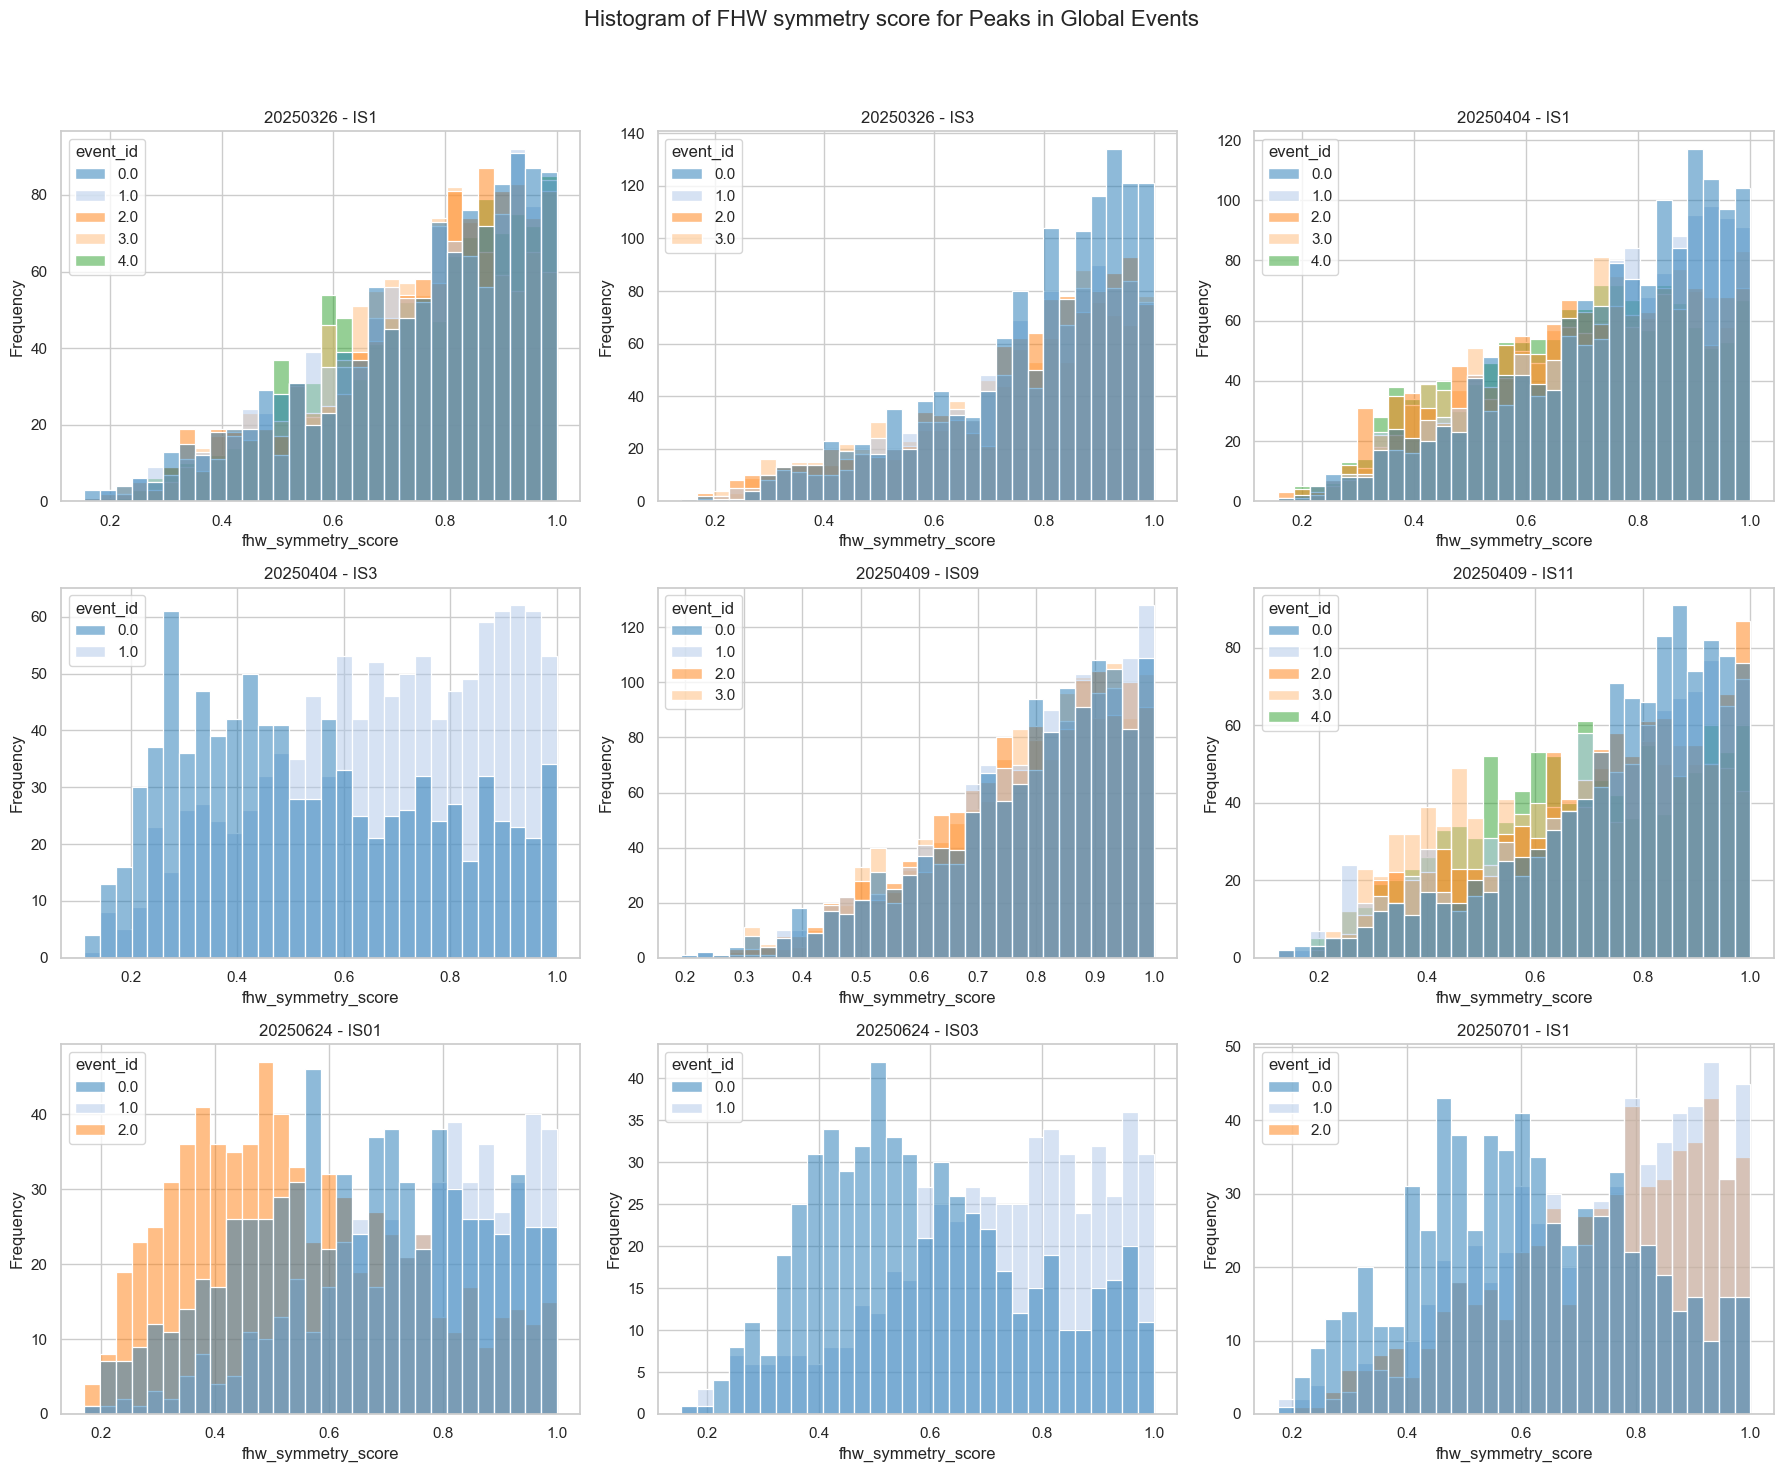

In [12]:
subset_peaks = peaks[peaks["in_event"] == "global"]
plot_histogram_by_group(
    df=subset_peaks,
    value_column="activation_duration",
    group_column="event_id",
    title="Histogram of Activation Durations for Peaks in Global Events",
    bin_width=3,
    n_cols=3,
    multiple="layer"
)
plot_histogram_by_group(
    df=subset_peaks,
    value_column="prominence",
    group_column="event_id",
    title="Histogram of Prominences for Peaks in Global Events",
    bin_width=3,
    n_cols=3,
    multiple="layer"
)
plot_histogram_by_group(
    df=subset_peaks,
    value_column="fhw_symmetry_score",
    group_column="event_id",
    title="Histogram of FHW symmetry score for Peaks in Global Events",
    bin_count=30,
    n_cols=3,
    multiple="layer"
)


#🔍 Peak Type: Sequential — 31457 peaks


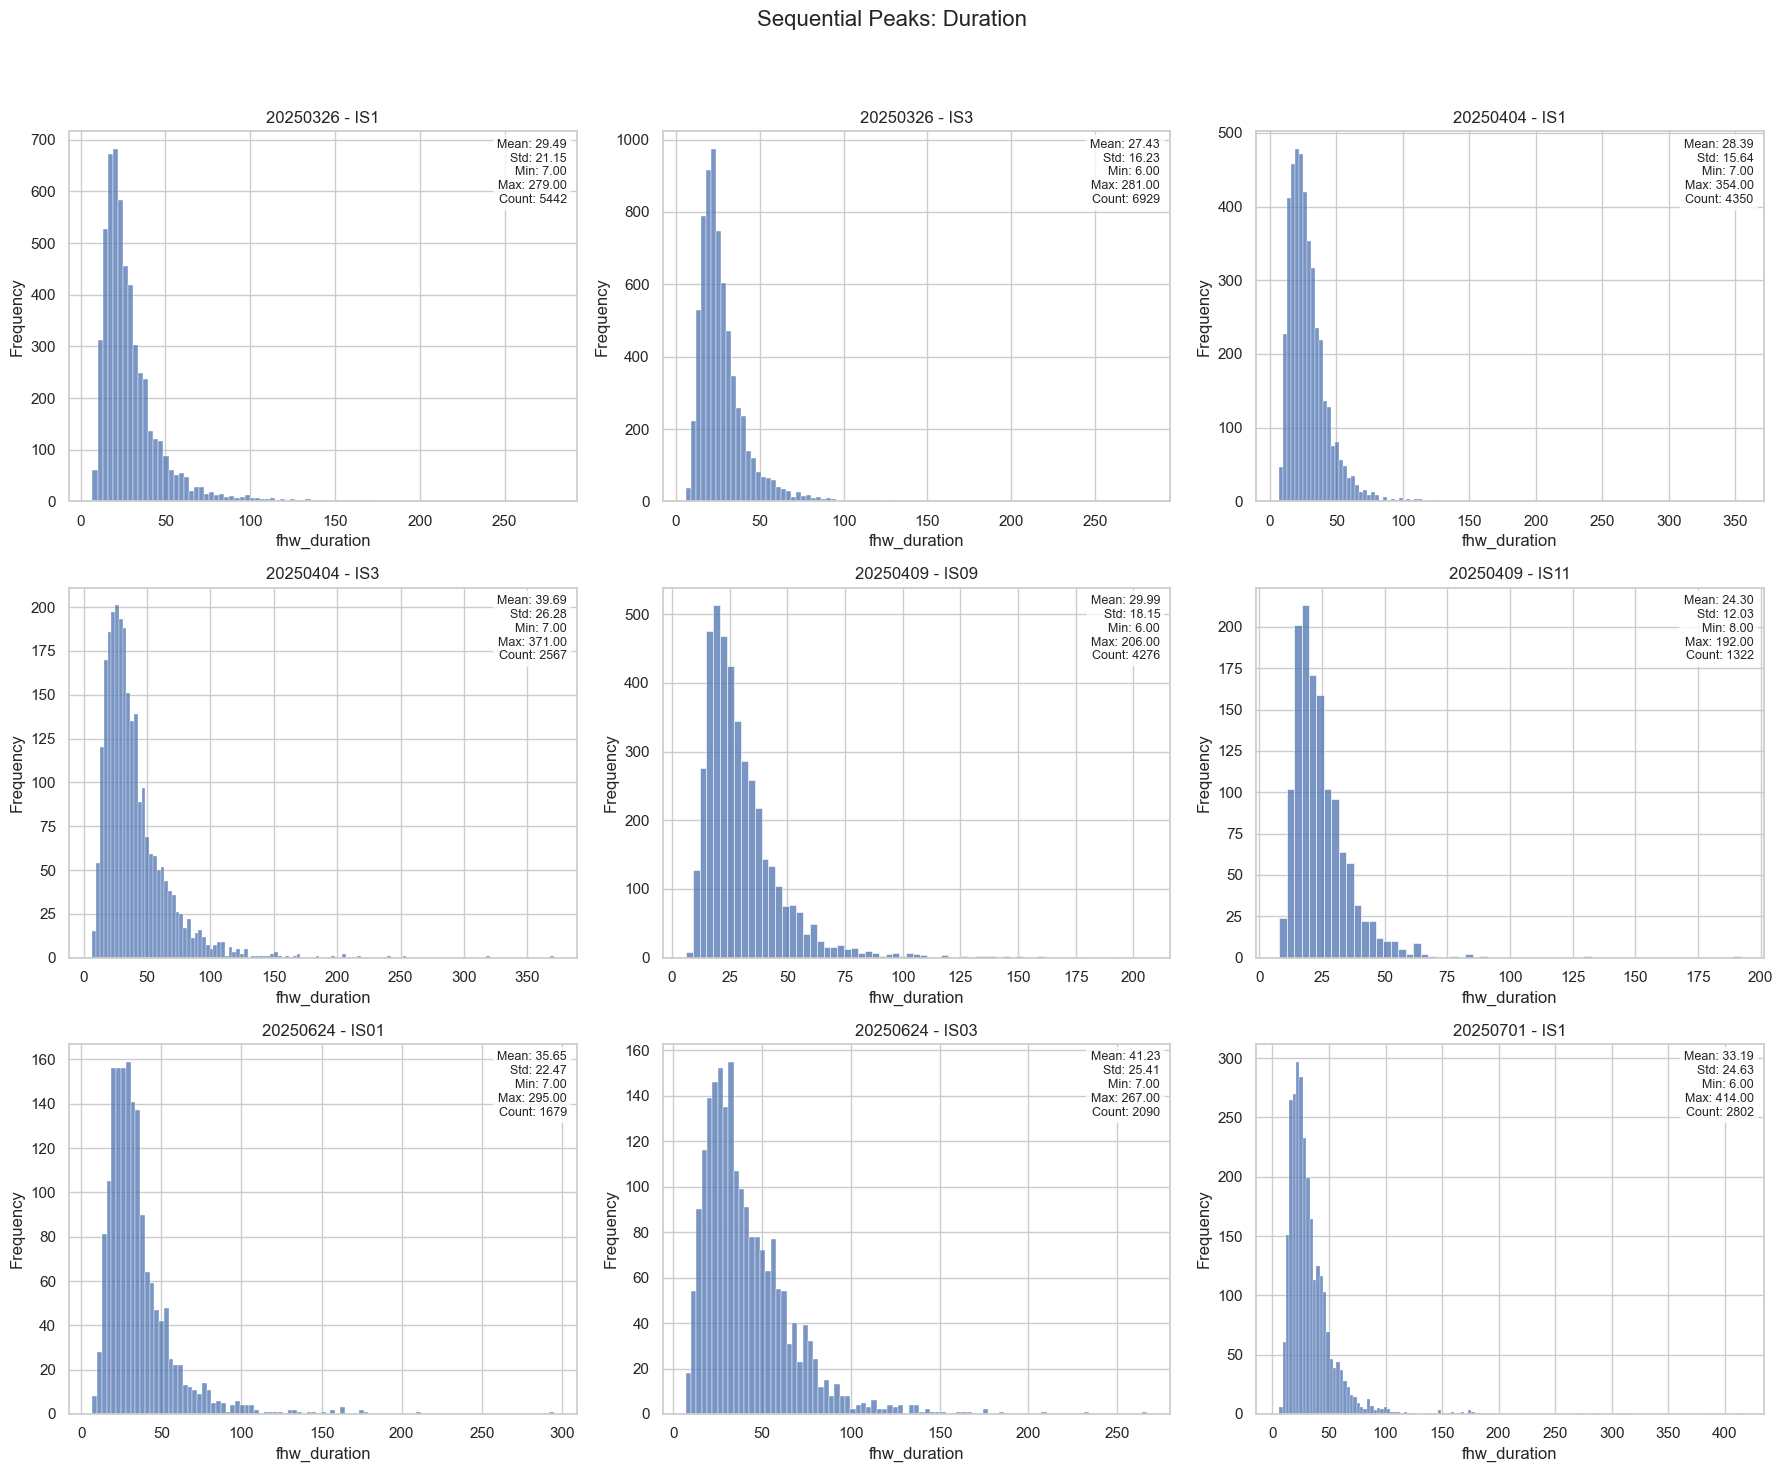

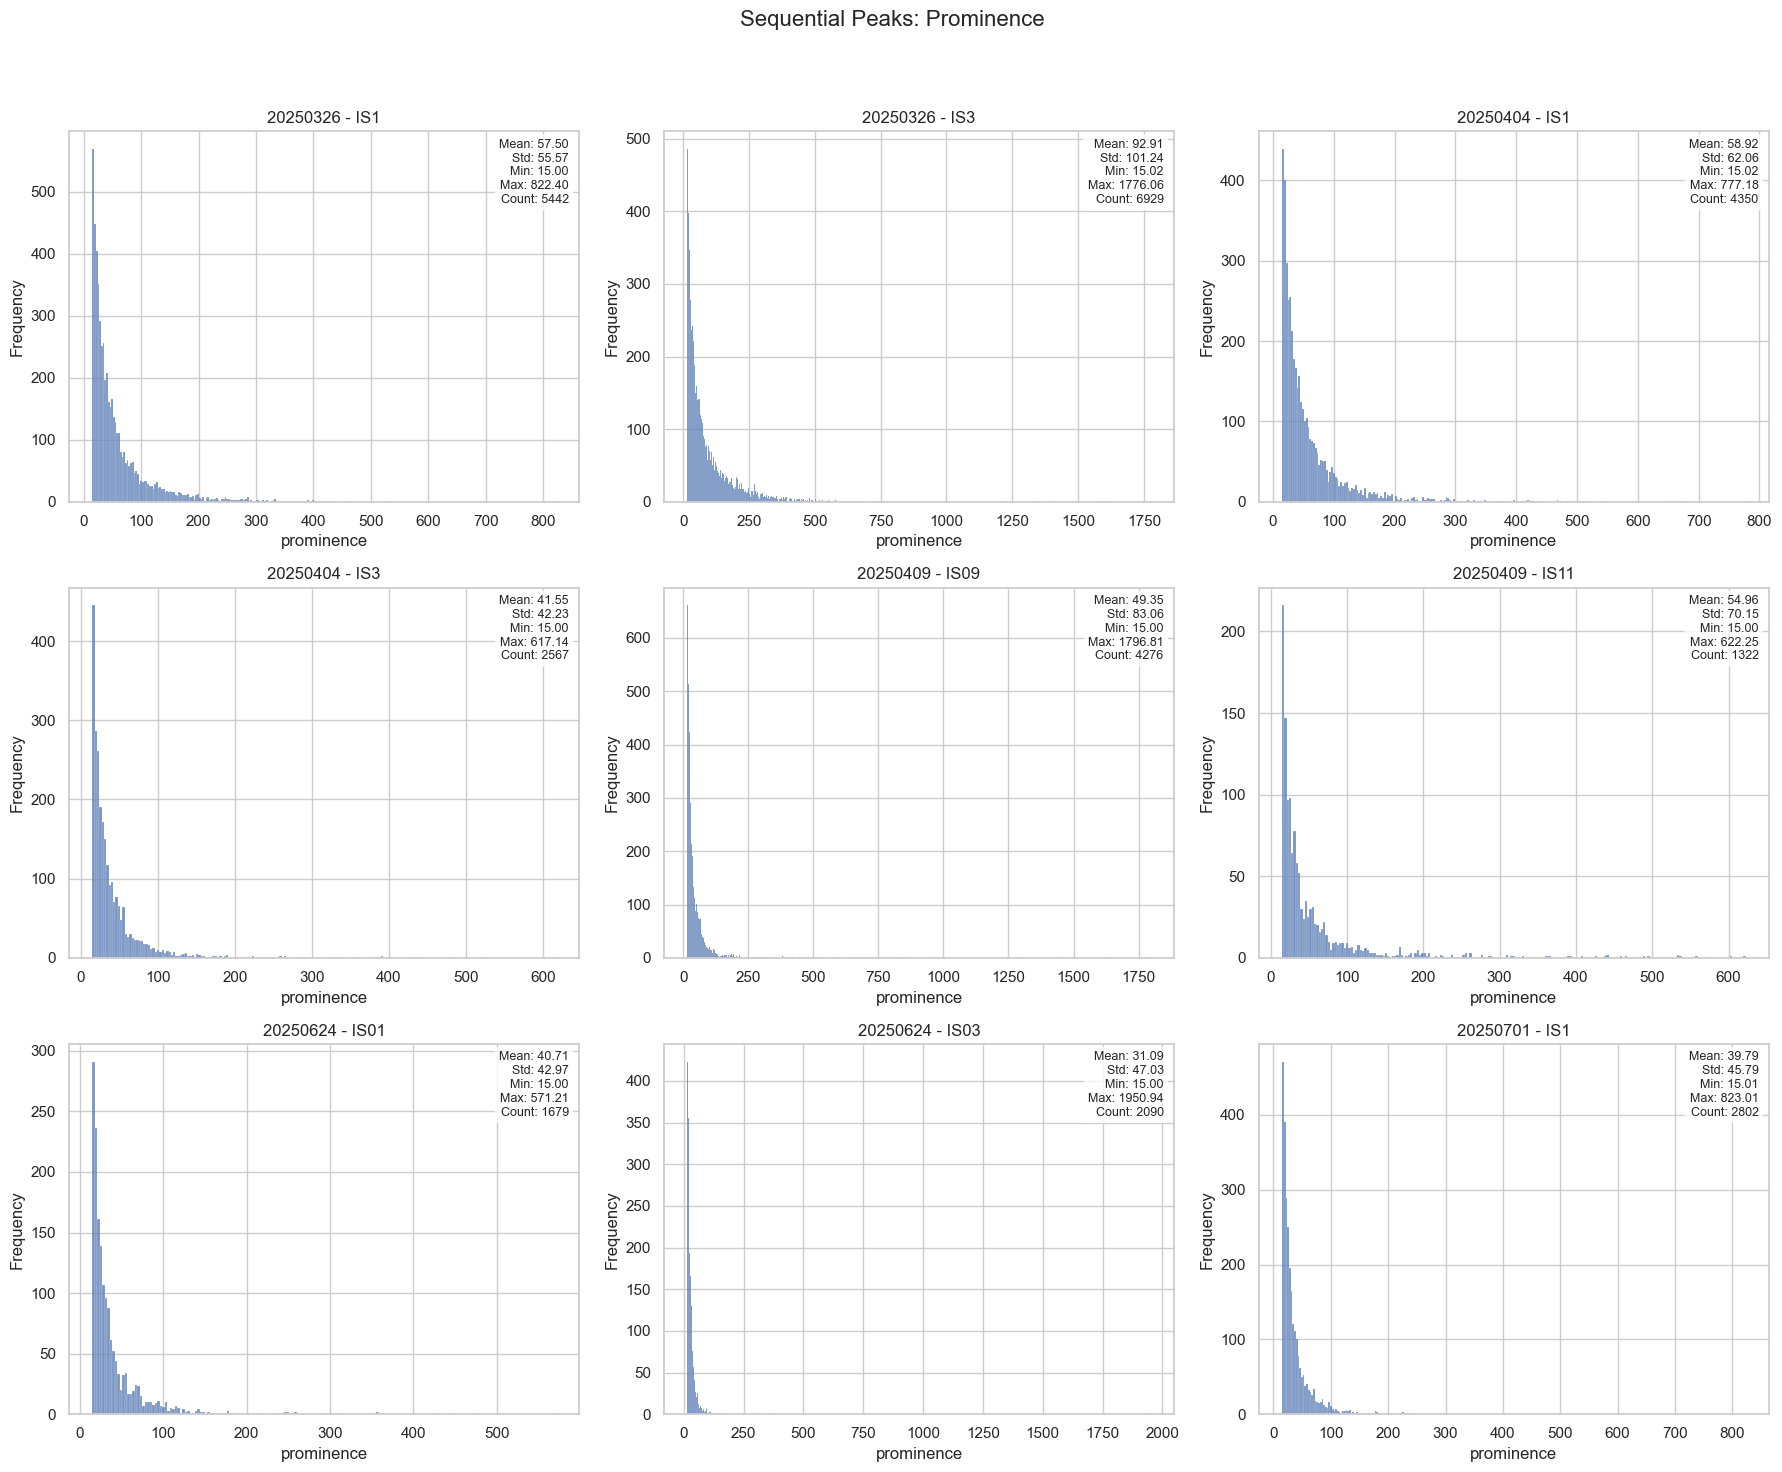

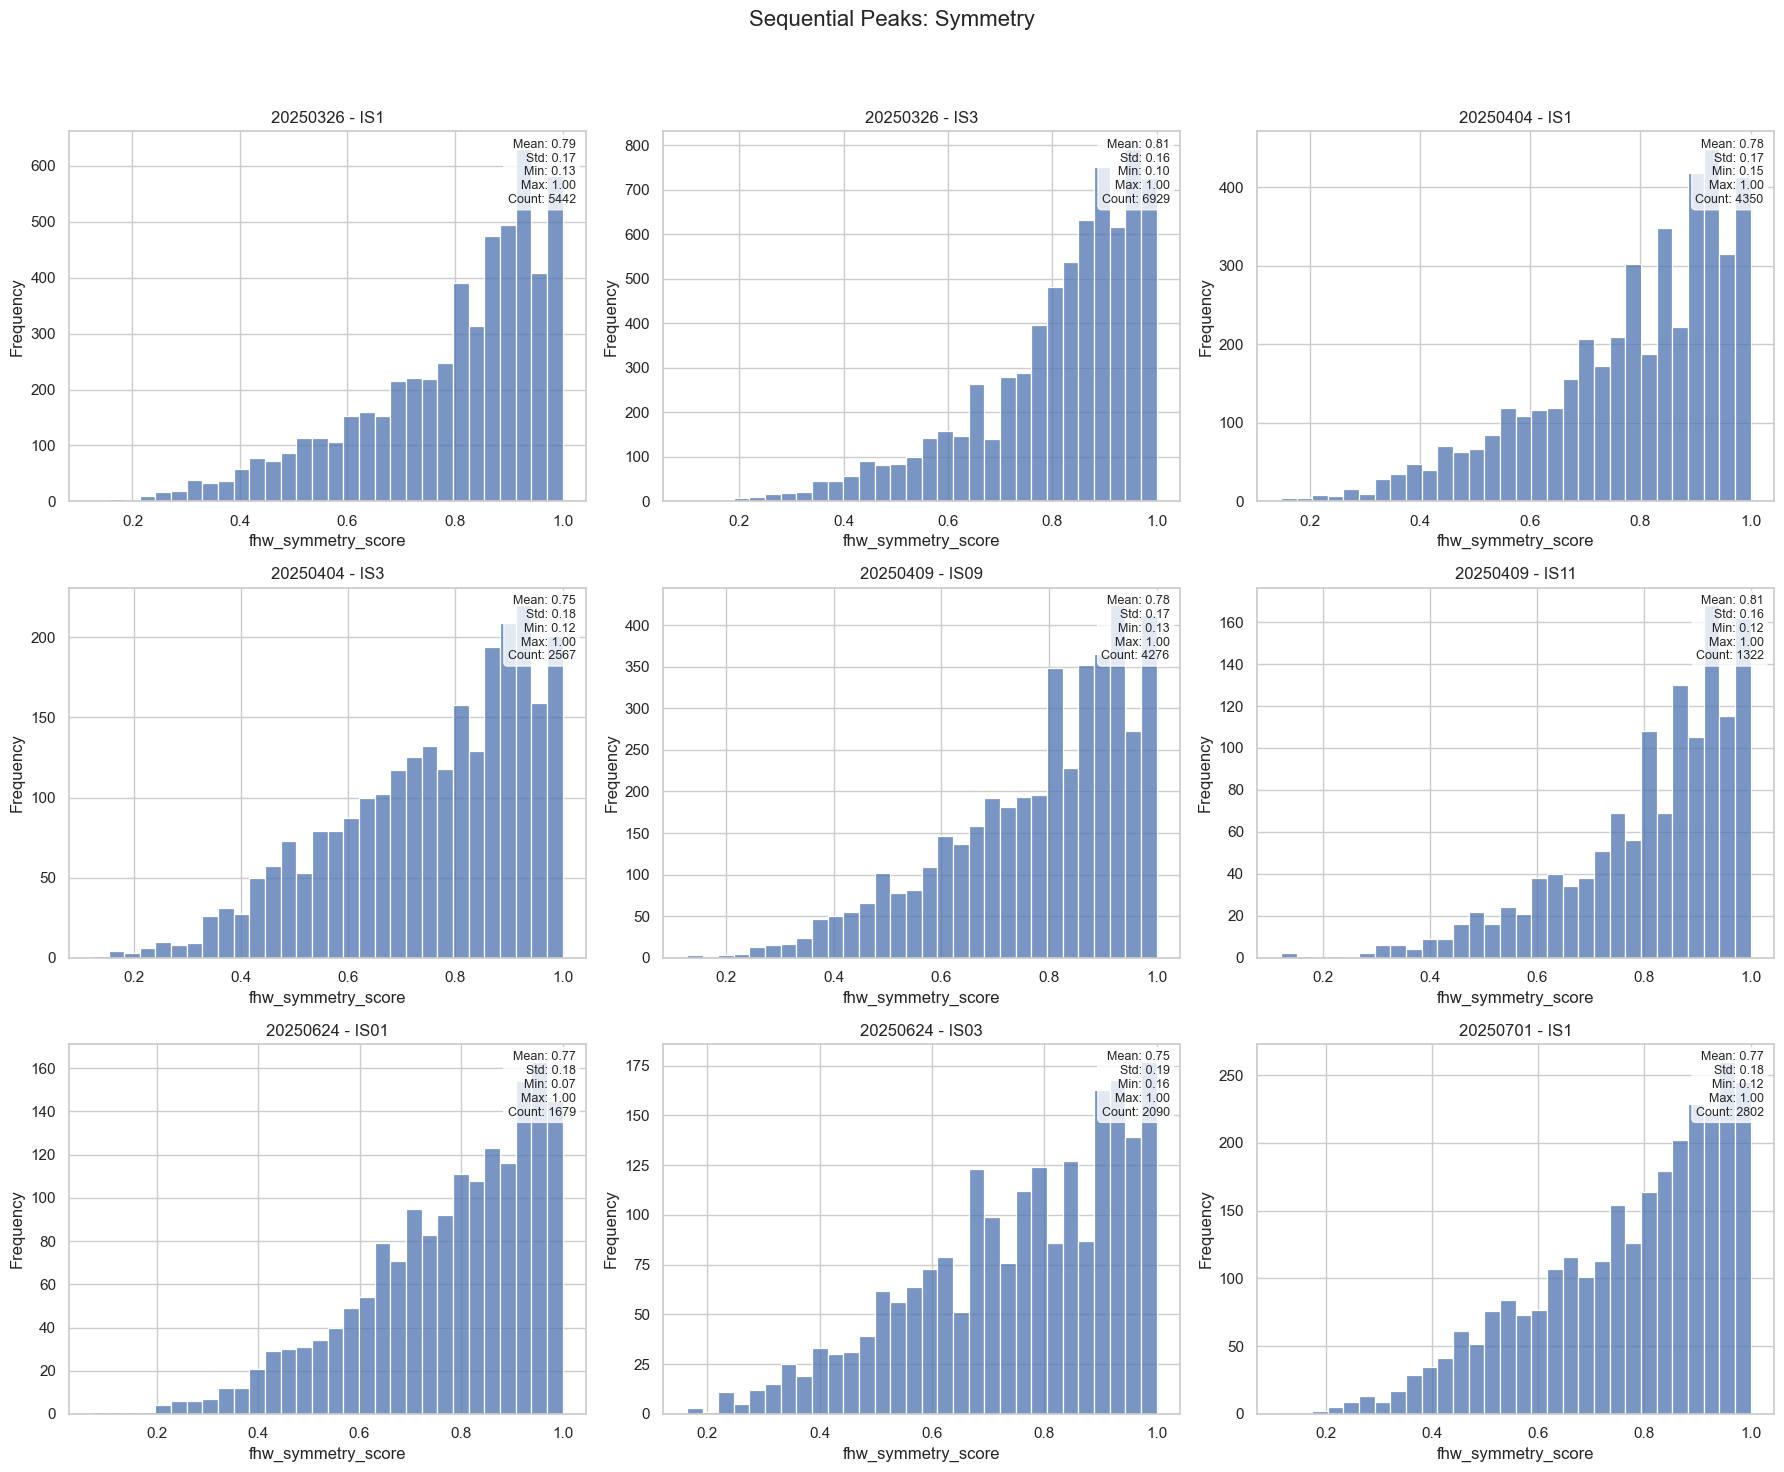


#🔍 Peak Type: Individual — 10040 peaks


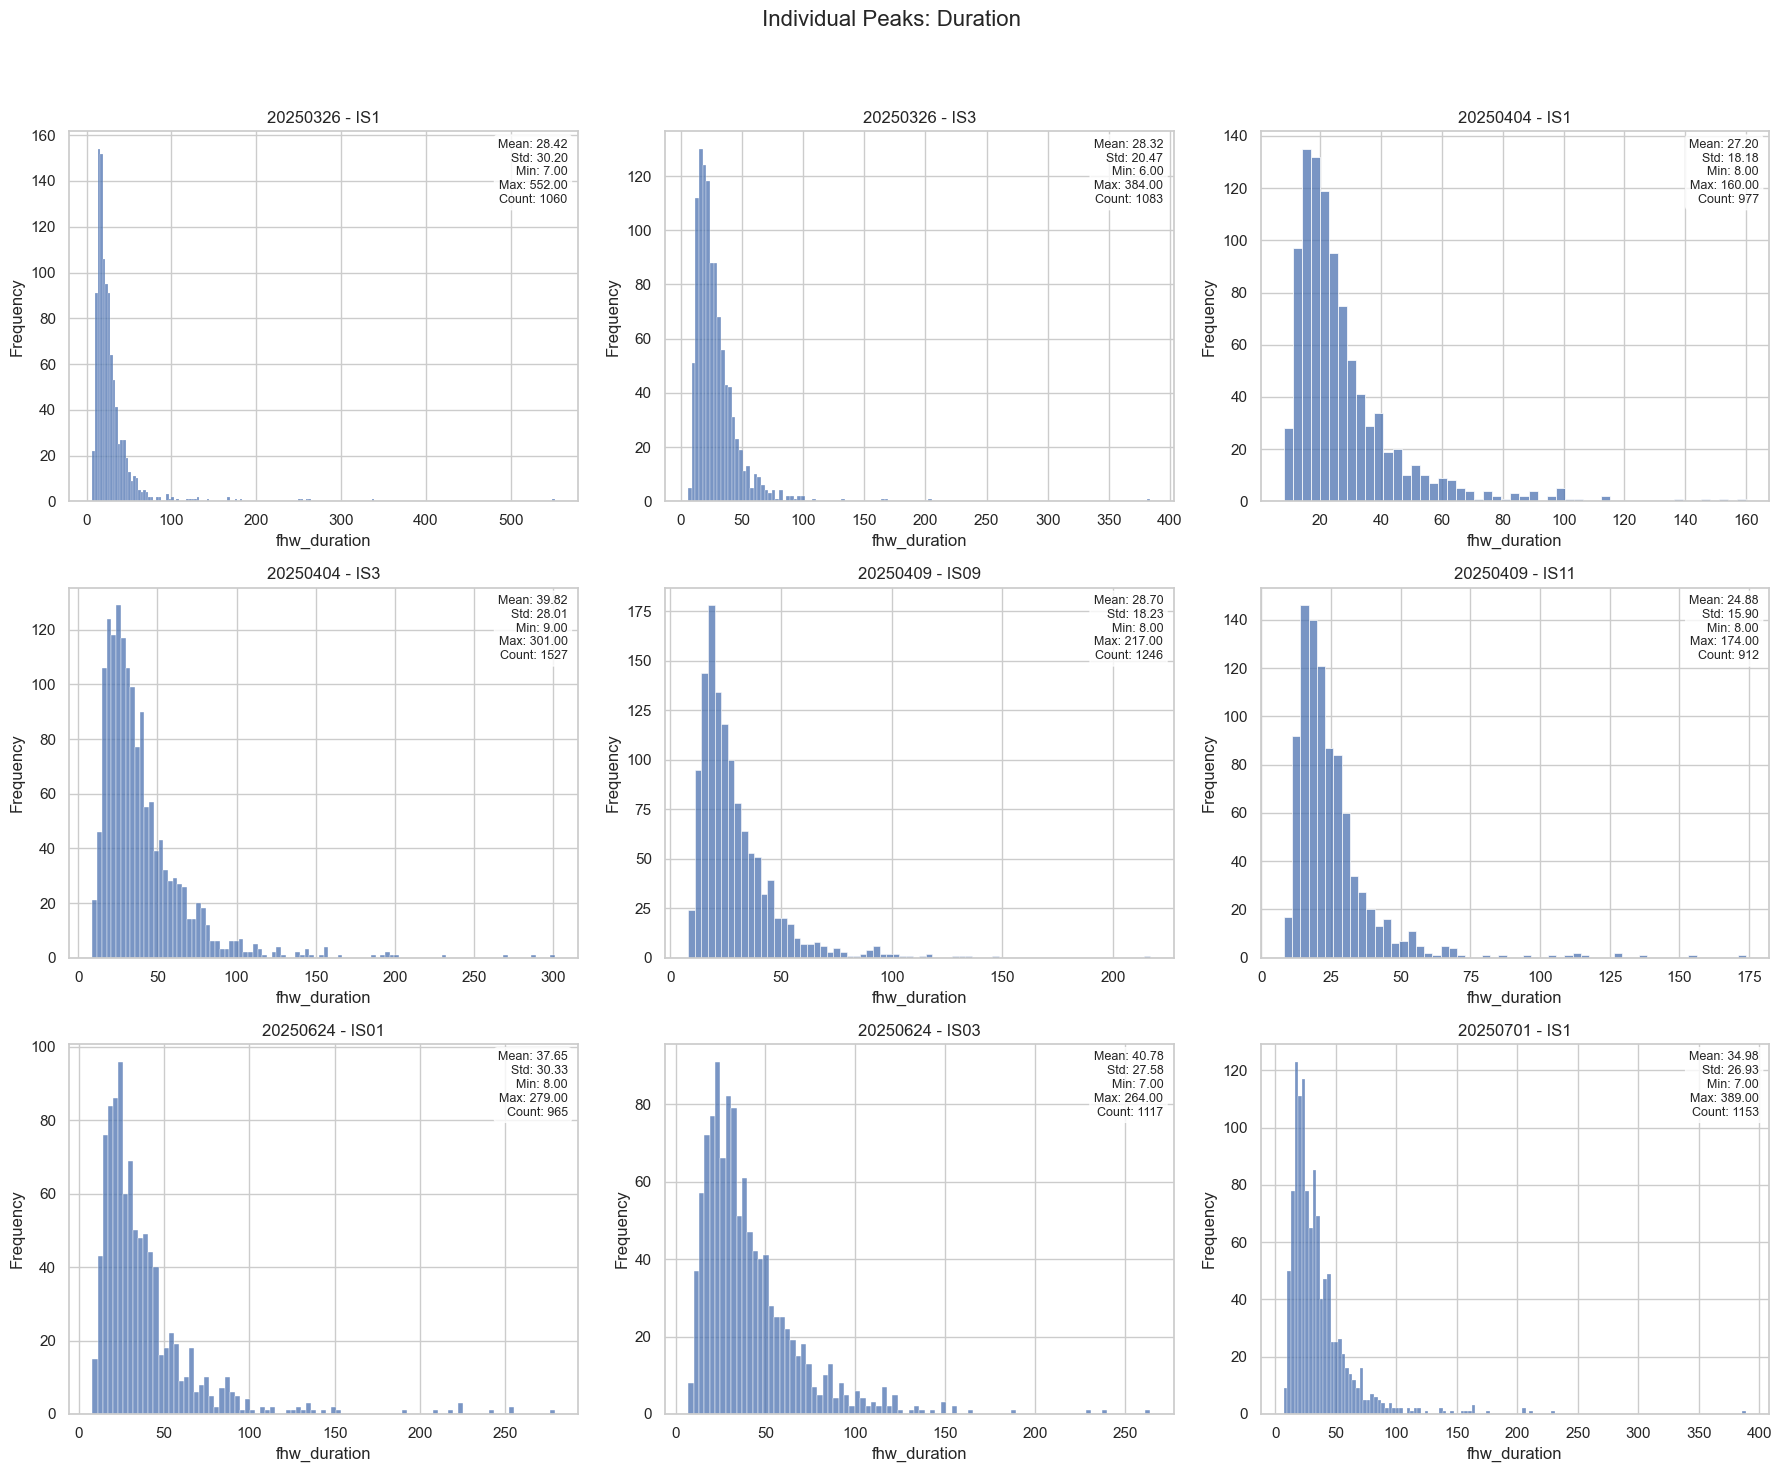

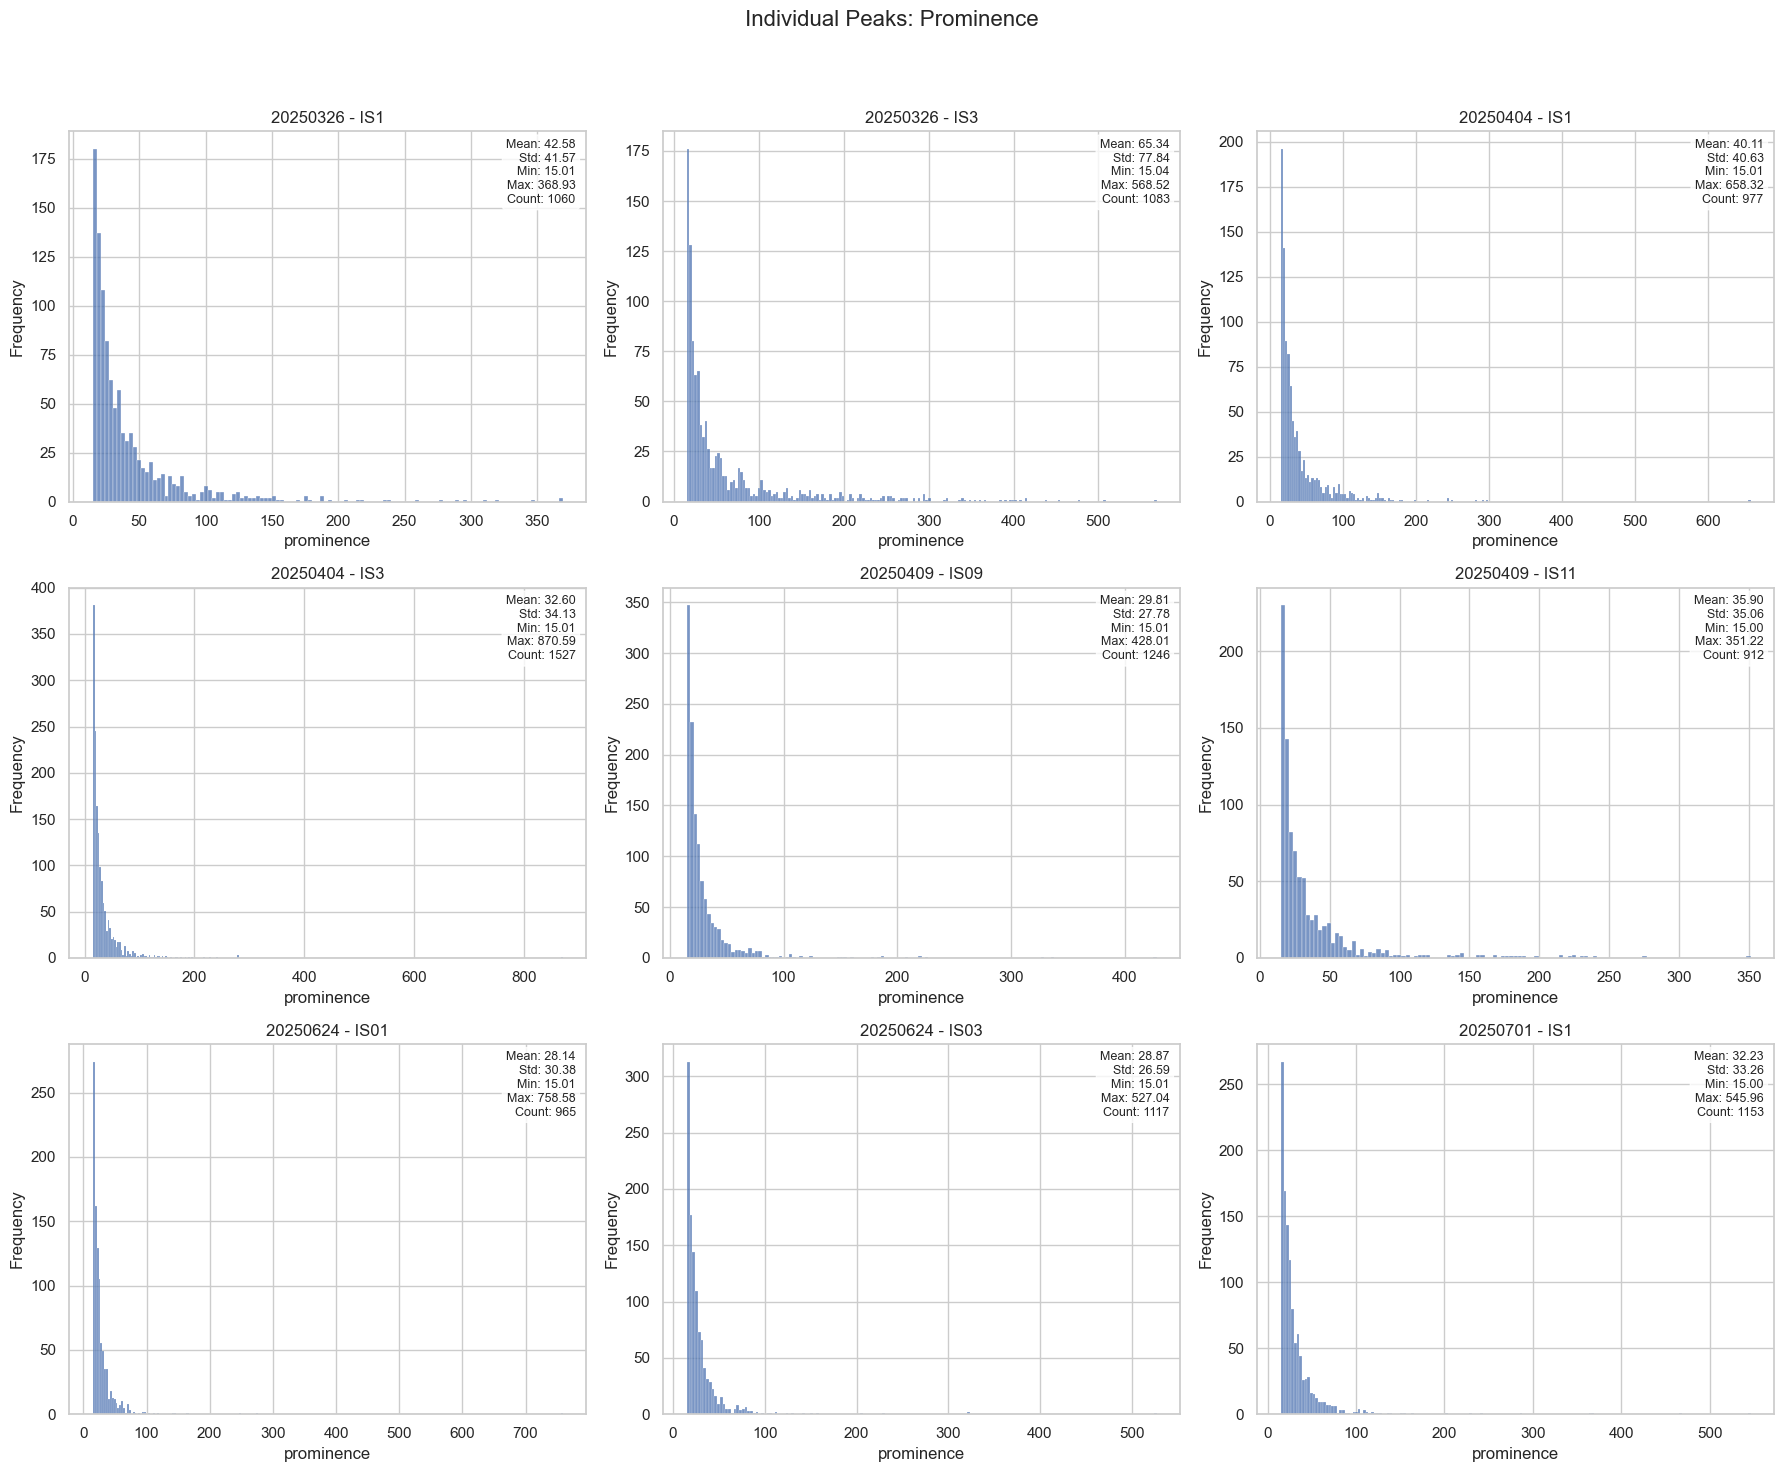

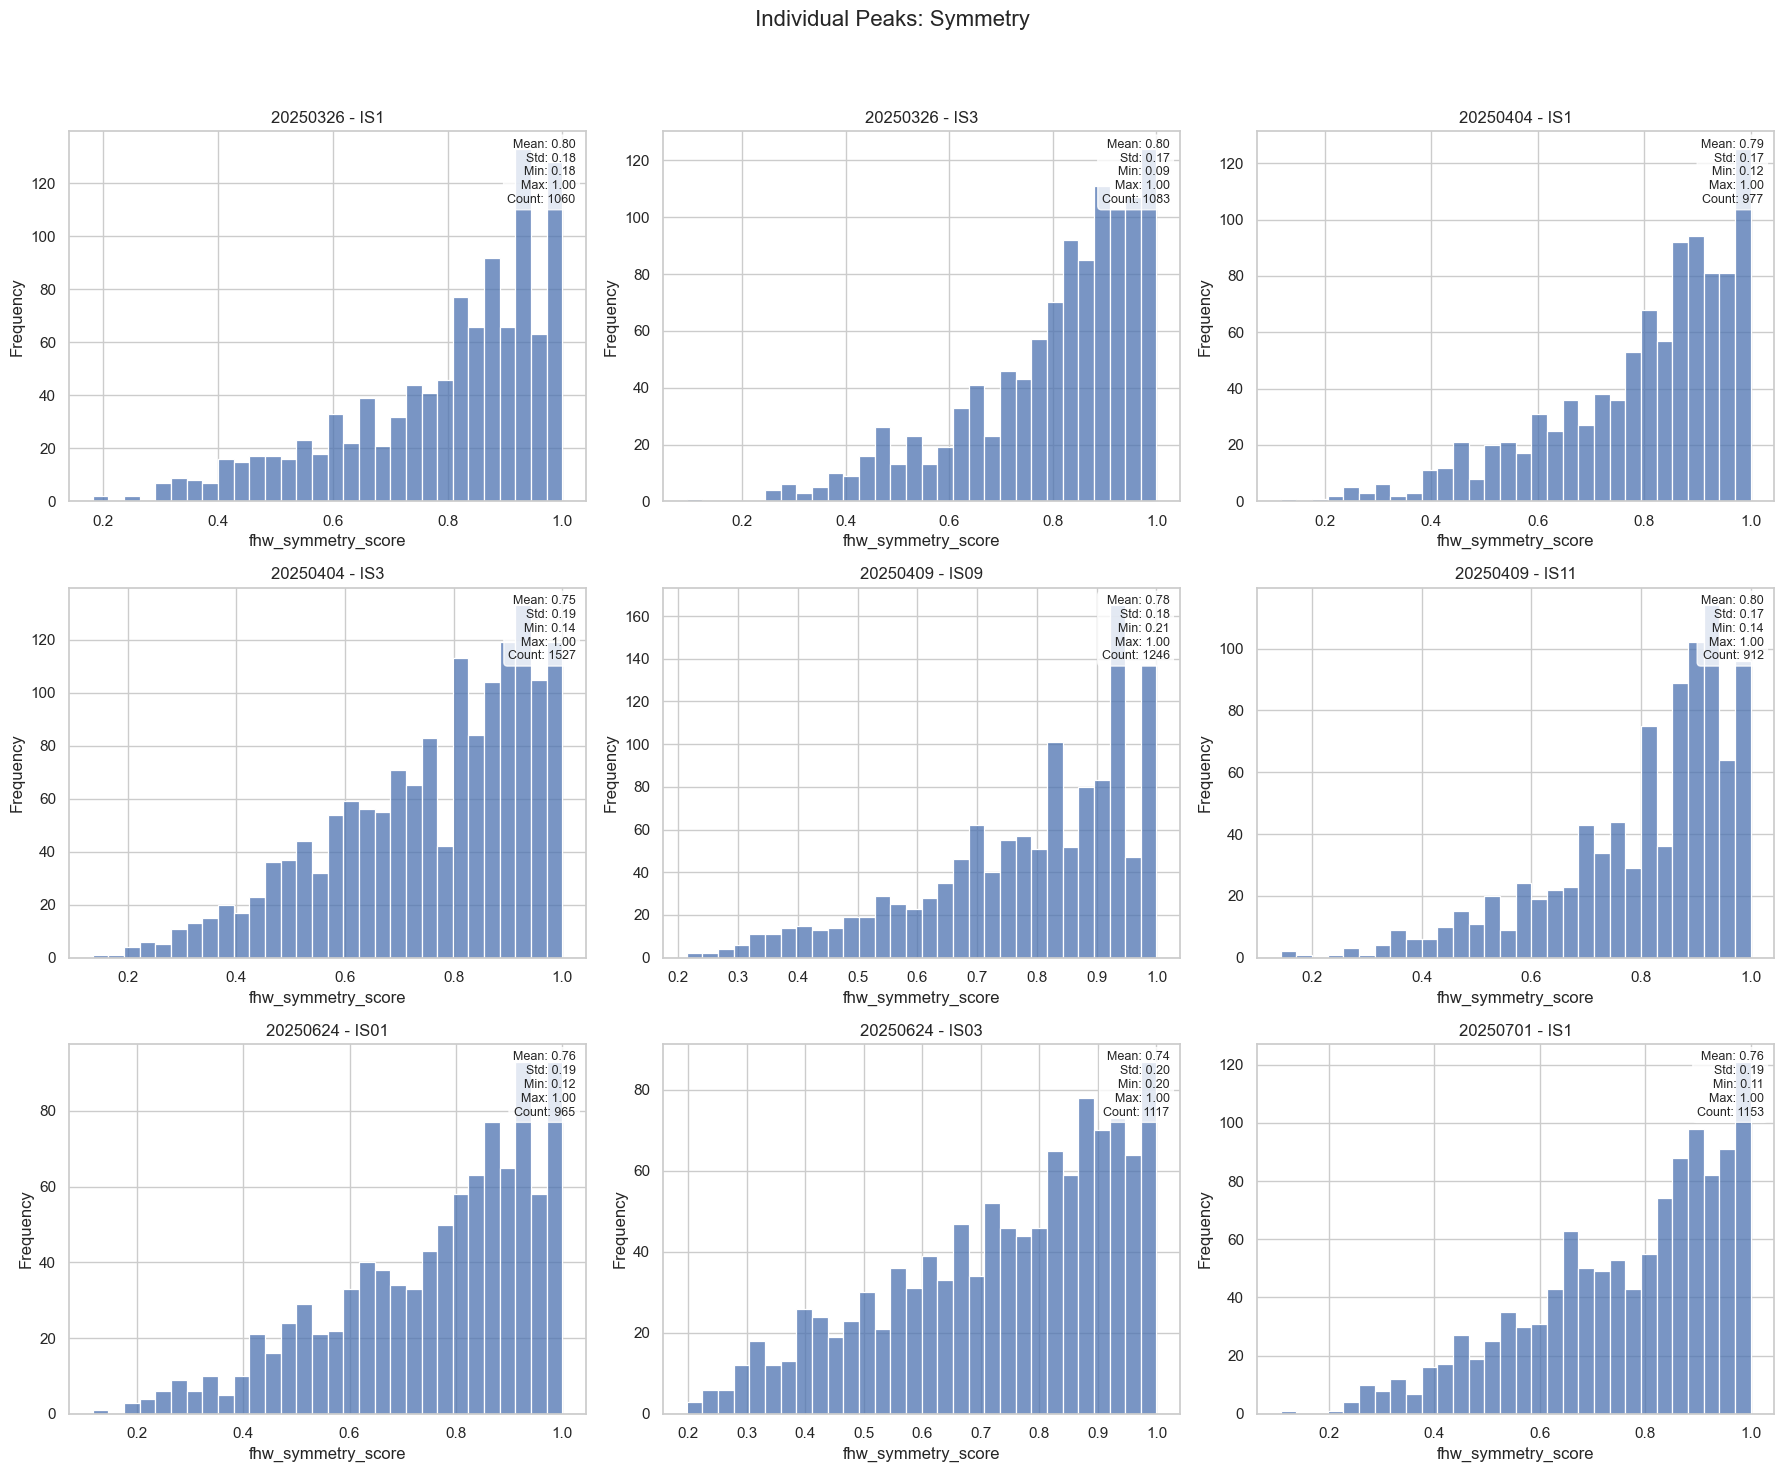

In [8]:

for event_type in ["sequential", "individual"]:
    subset = peaks[peaks["in_event"] == event_type]
    print(f"\n#🔍 Peak Type: {event_type.title()} — {len(subset)} peaks")
    plot_histogram_by_dataset(subset, "fhw_duration", f"{event_type.title()} Peaks: Duration", bin_width=3, n_cols=3)
    plot_histogram_by_dataset(subset, "prominence", f"{event_type.title()} Peaks: Prominence", bin_width=3, n_cols=3)
    plot_histogram_by_dataset(subset, "fhw_symmetry_score", f"{event_type.title()} Peaks: Symmetry", bin_count=30, n_cols=3)

## 🧬 Cell Metrics

We analyze:
- Number of peaks per cell (activity)
- Periodicity score (oscillatory behavior)
- Proportion of active vs inactive cells

*Interpretation:*

*Active cells:* 
*Nearly all cells (>99.9%) are active in every dataset. This indicates excellent signal integrity and robust experimental conditions.*
*Activity is highly homogeneous across datasets.*

*Number of peaks per cell:*
*High total peak count (>10,000 peaks per dataset), with a balanced and near-normal distribution.*
*This reflects widespread and stable activity across the population.*

*Periodicity:*
*Periodicity scores (~0.7 ± 0.1) remain consistent across both imaging runs.*
*This suggests that rhythmic calcium oscillations are preserved, even when global excitability drops.*


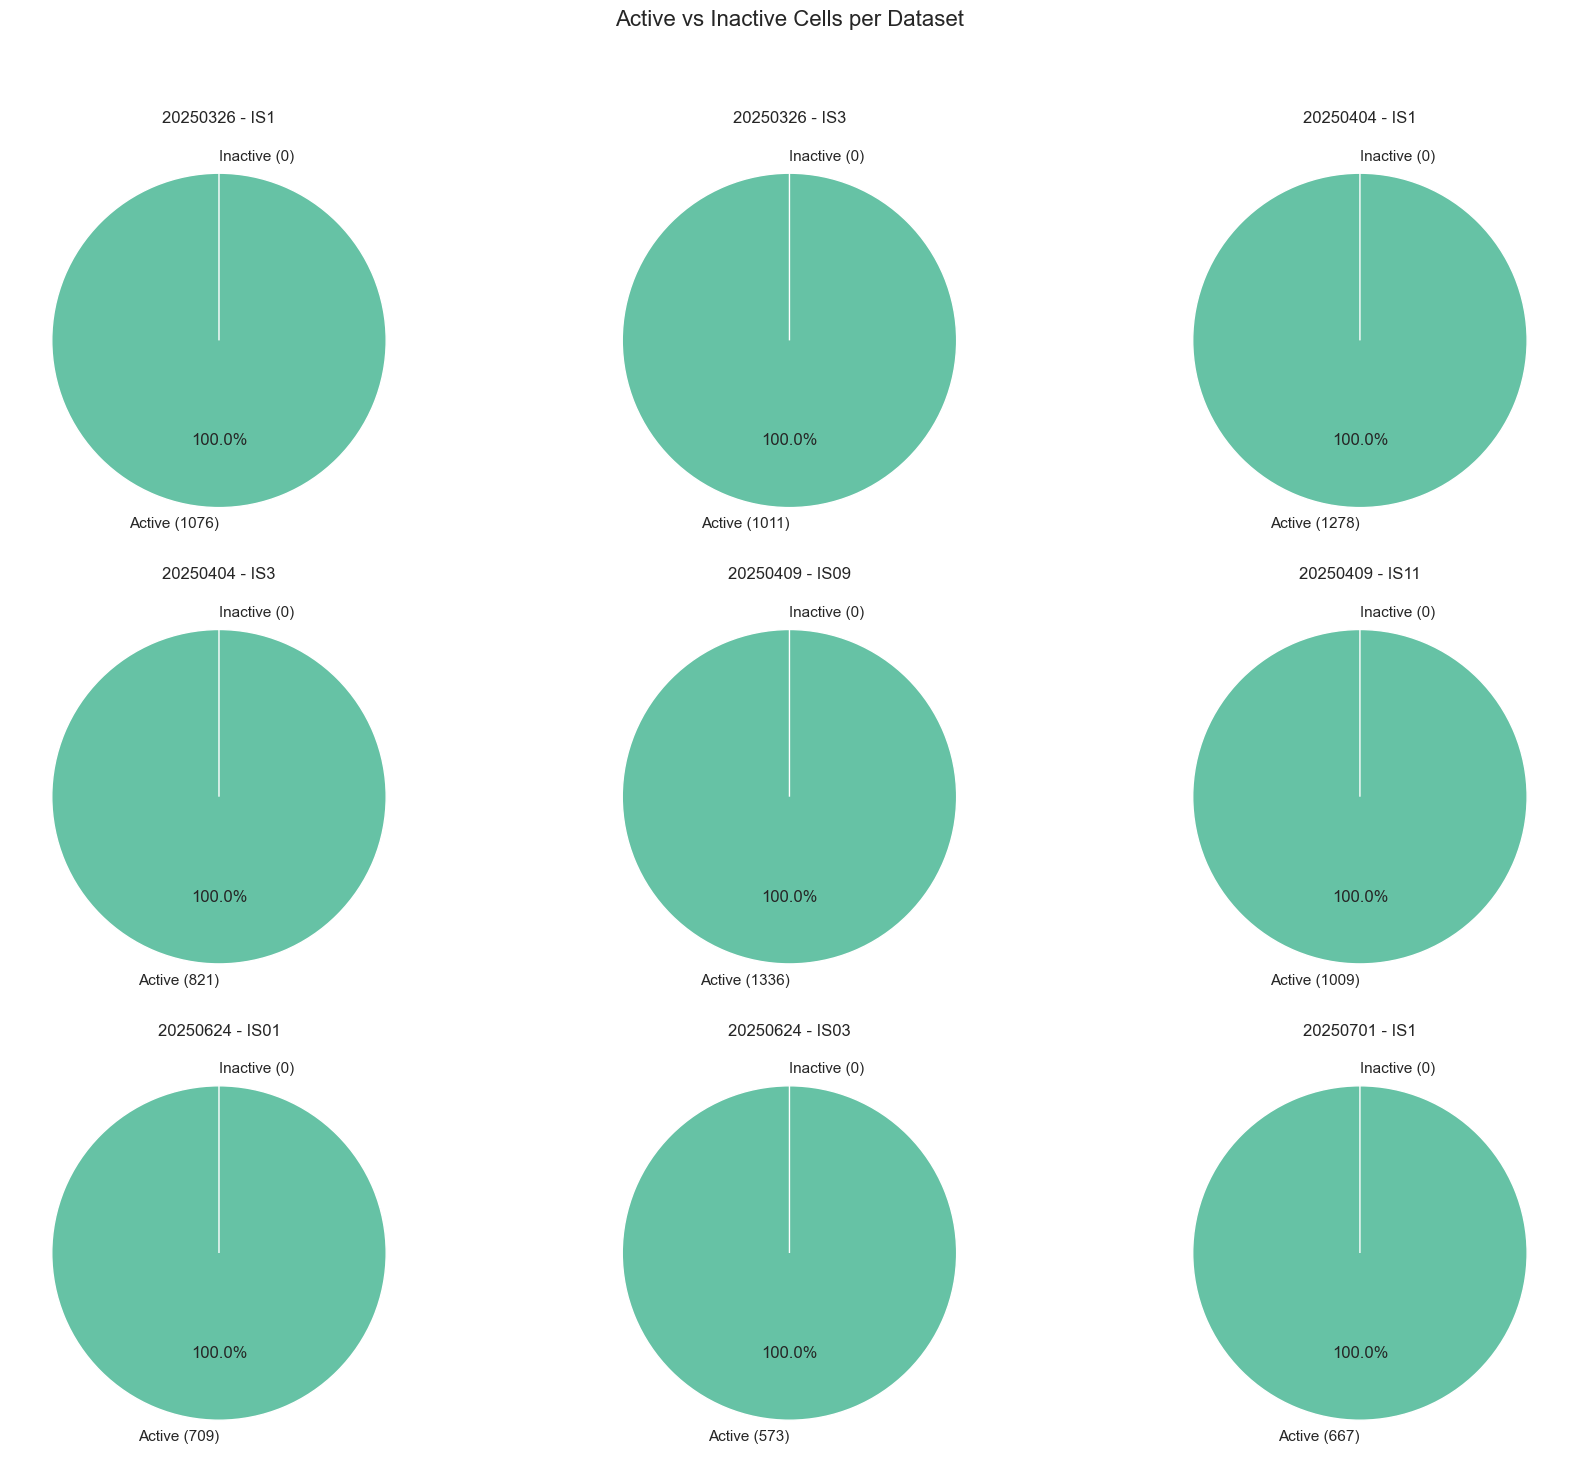

In [9]:
# Convert is_active to label for display purposes
cells["active_label"] = cells["is_active"].map({1: "Active", 0: "Inactive"})

plot_pie_chart_by_dataset(
    df=cells,
    column="active_label",
    category_order=["Active", "Inactive"],
    colors={"Active": "#66c2a5", "Inactive": "#d3d3d3"},
    title="Active vs Inactive Cells per Dataset",
    n_cols=3
)

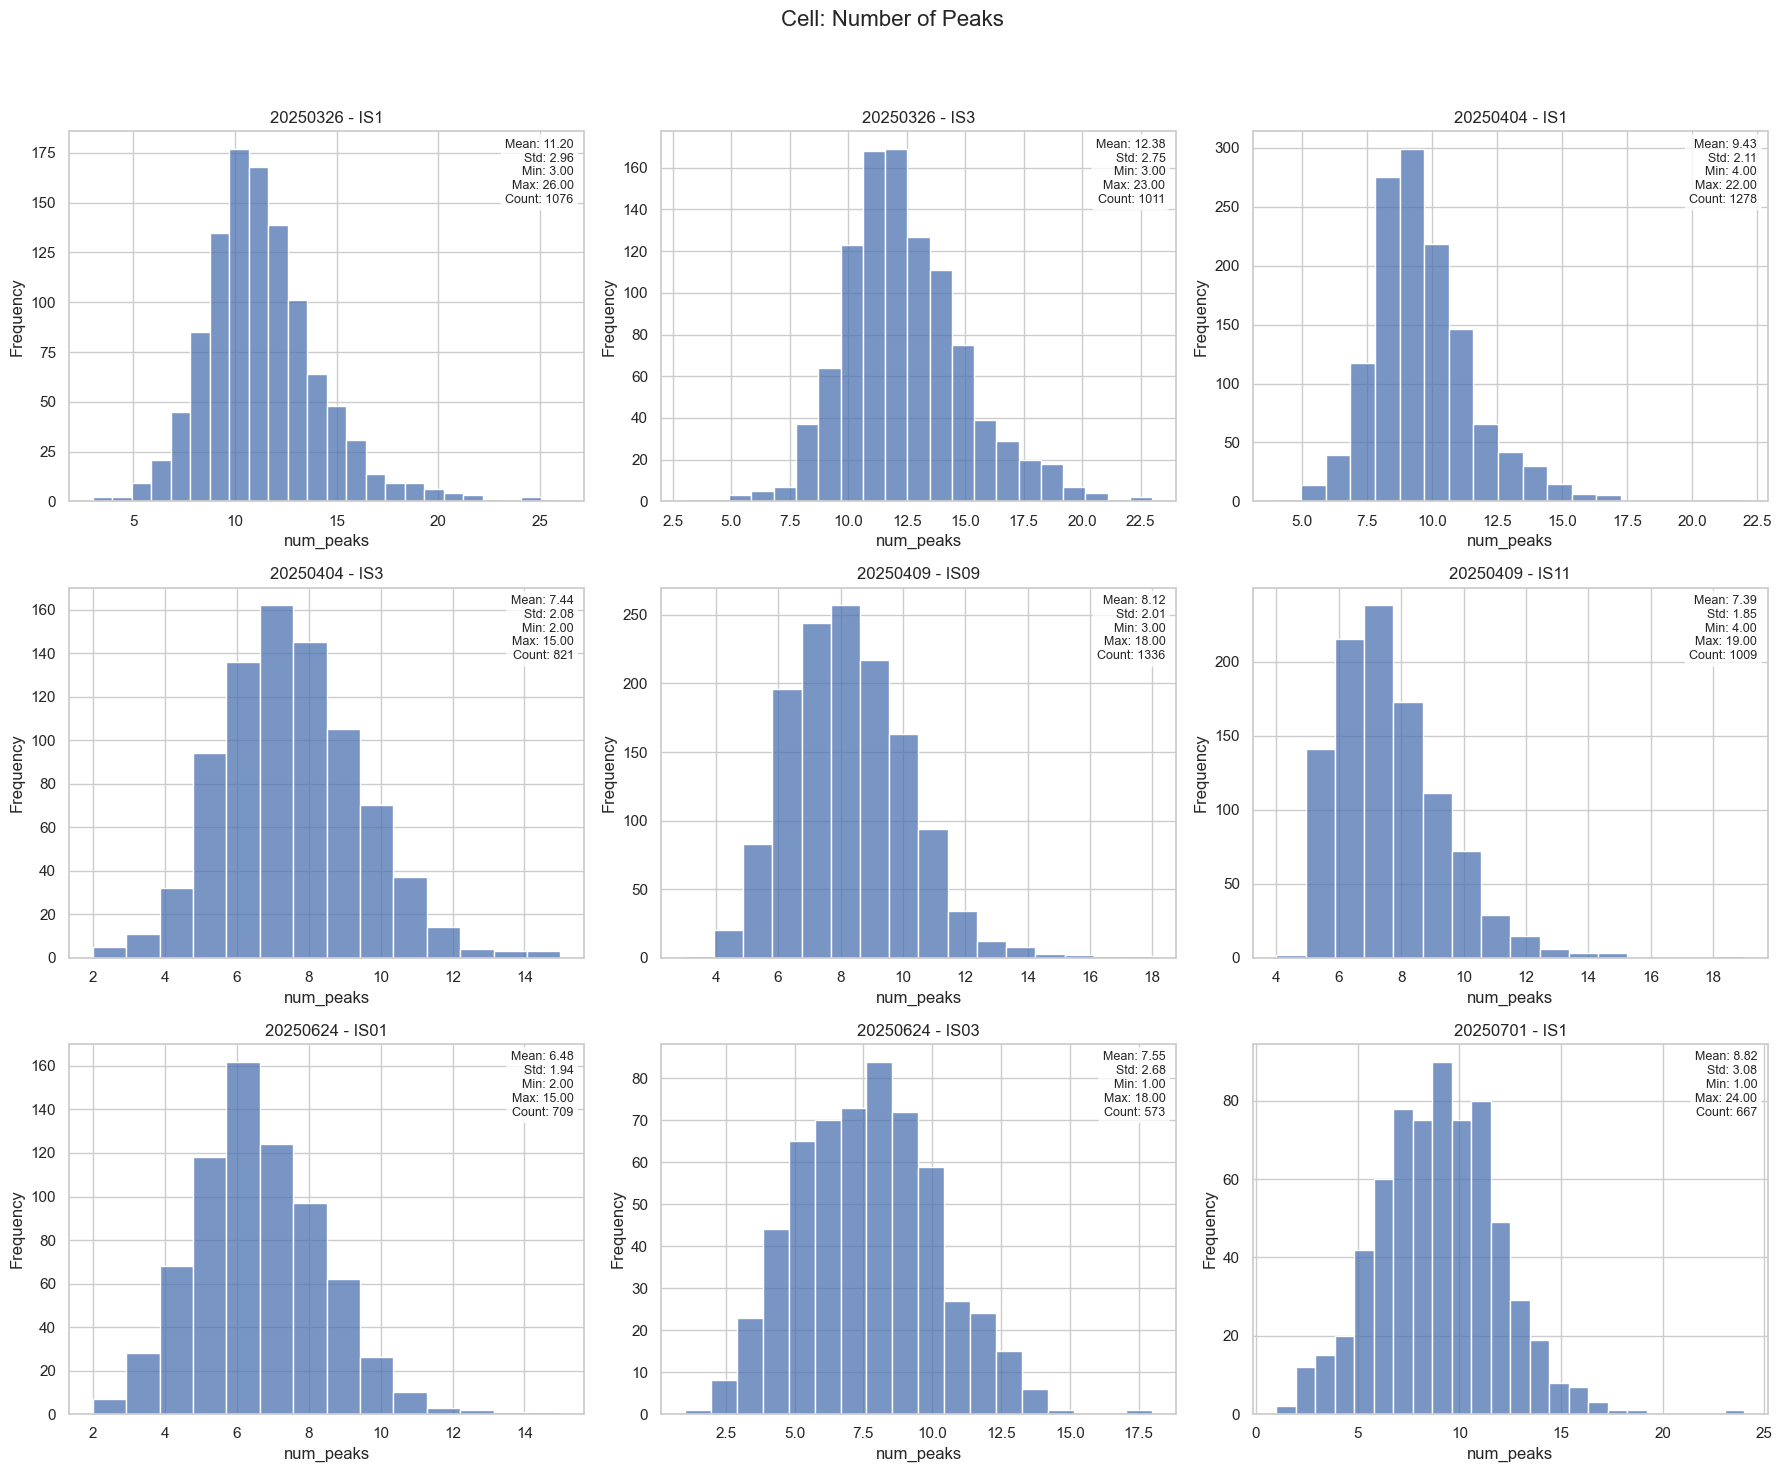

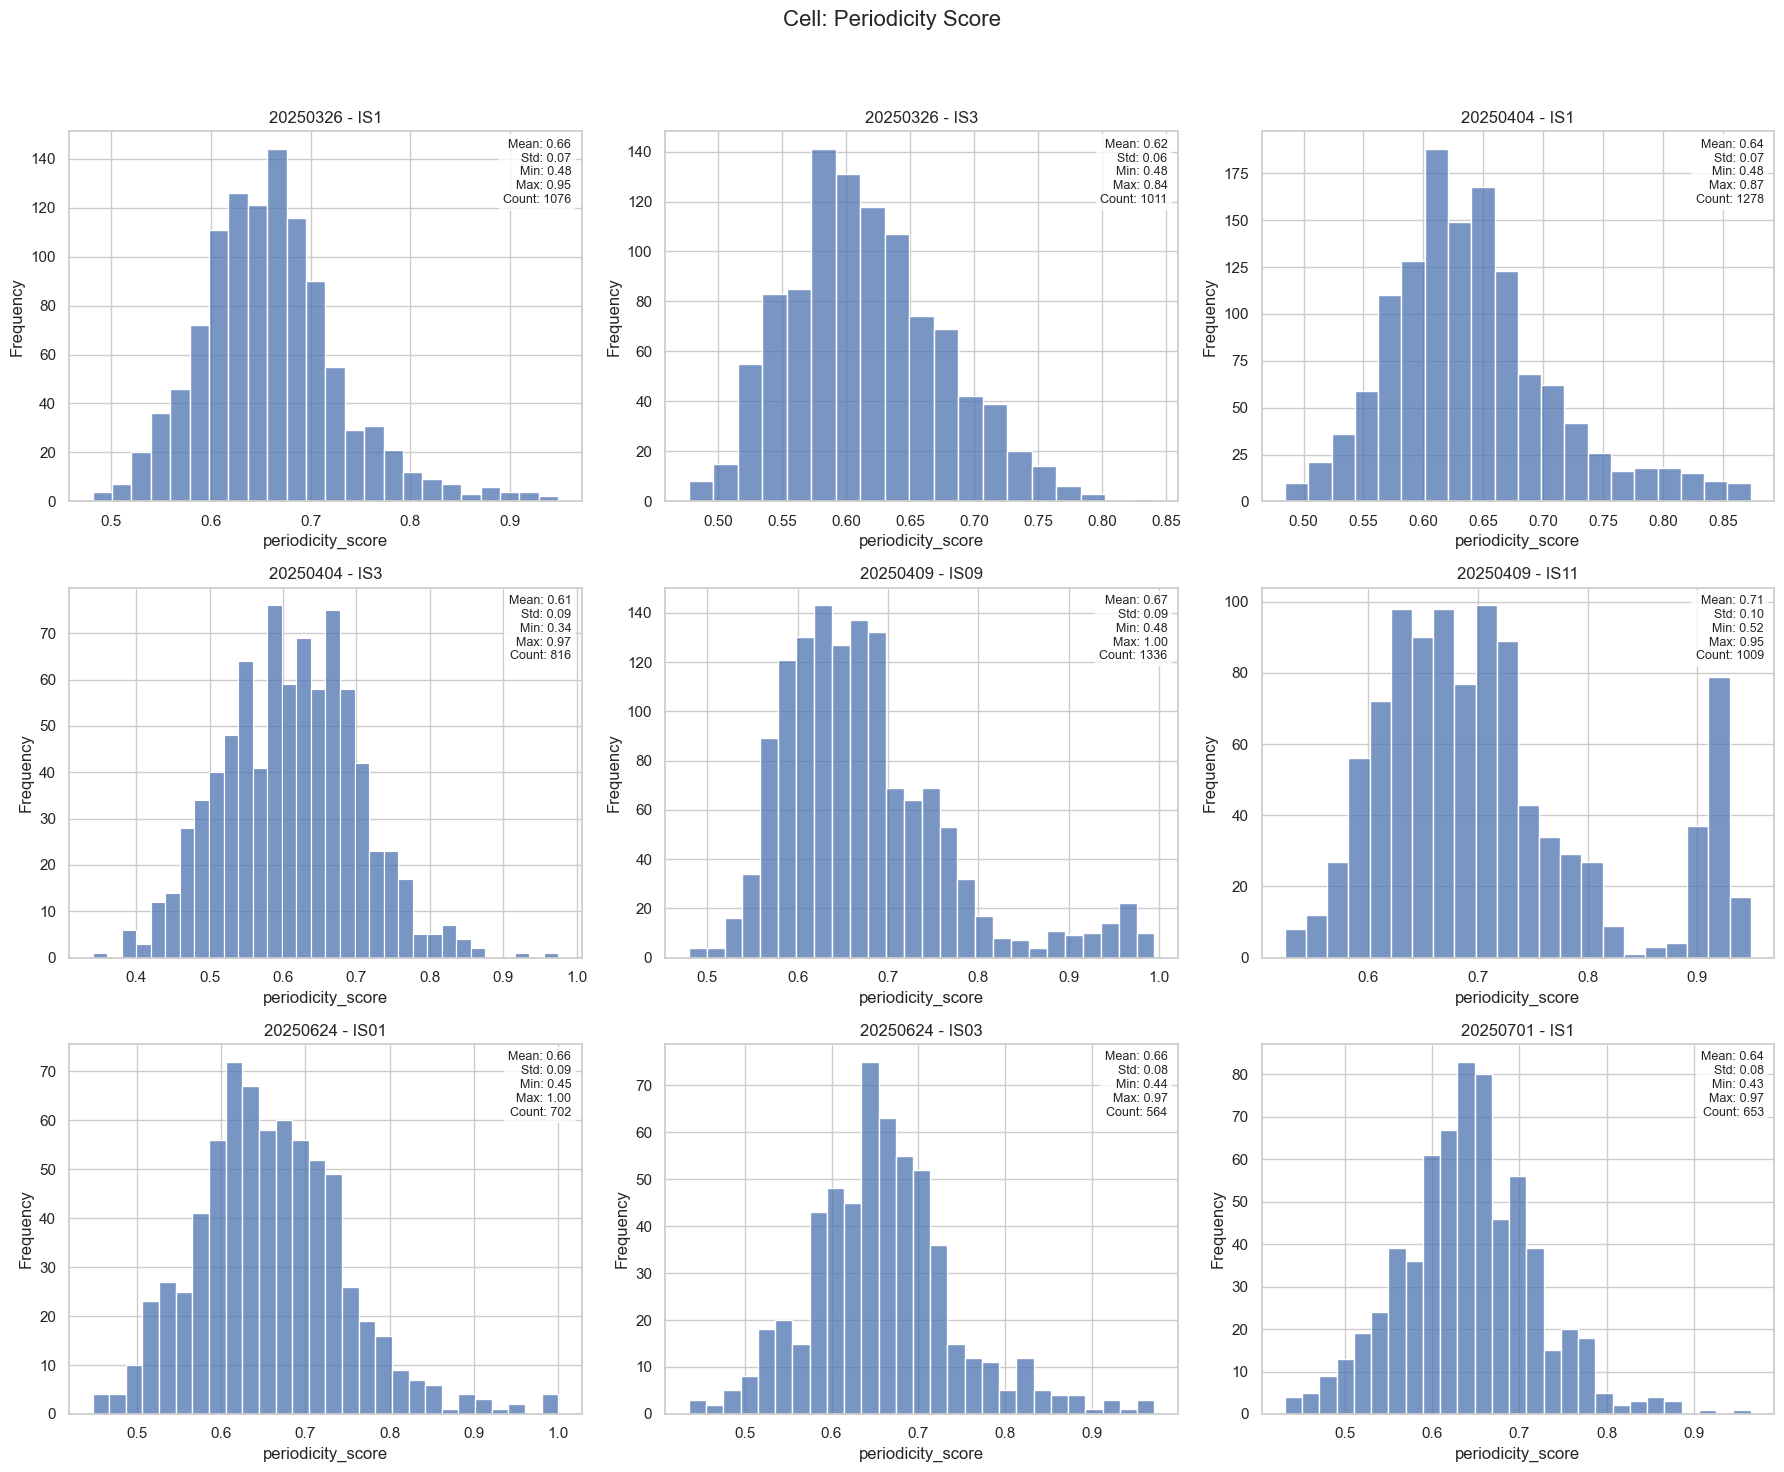

In [10]:
plot_histogram_by_dataset(cells, "num_peaks", "Cell: Number of Peaks", bin_width=1, n_cols=3)
plot_histogram_by_dataset(cells, "periodicity_score", "Cell: Periodicity Score", bin_width=0.02, n_cols=3)

## 🌊 Sequential Event Metrics

We focus on **spatiotemporal events**, extracting:
- Mean communication time and speed
- Geometric descriptors (elongation, radiality)
- Graph depth, number of involved cells


*Interpretation:*

- *Communication time: ~4.0 frames (STD ~2.5).*
- *Communication speed: ~6.2 units/frame.*
- *Cells involved: ~3.2 ± 2 cells per event.*

*These metrics are consistent across datasets and define the propagation baseline for healthy spontaneous events.*

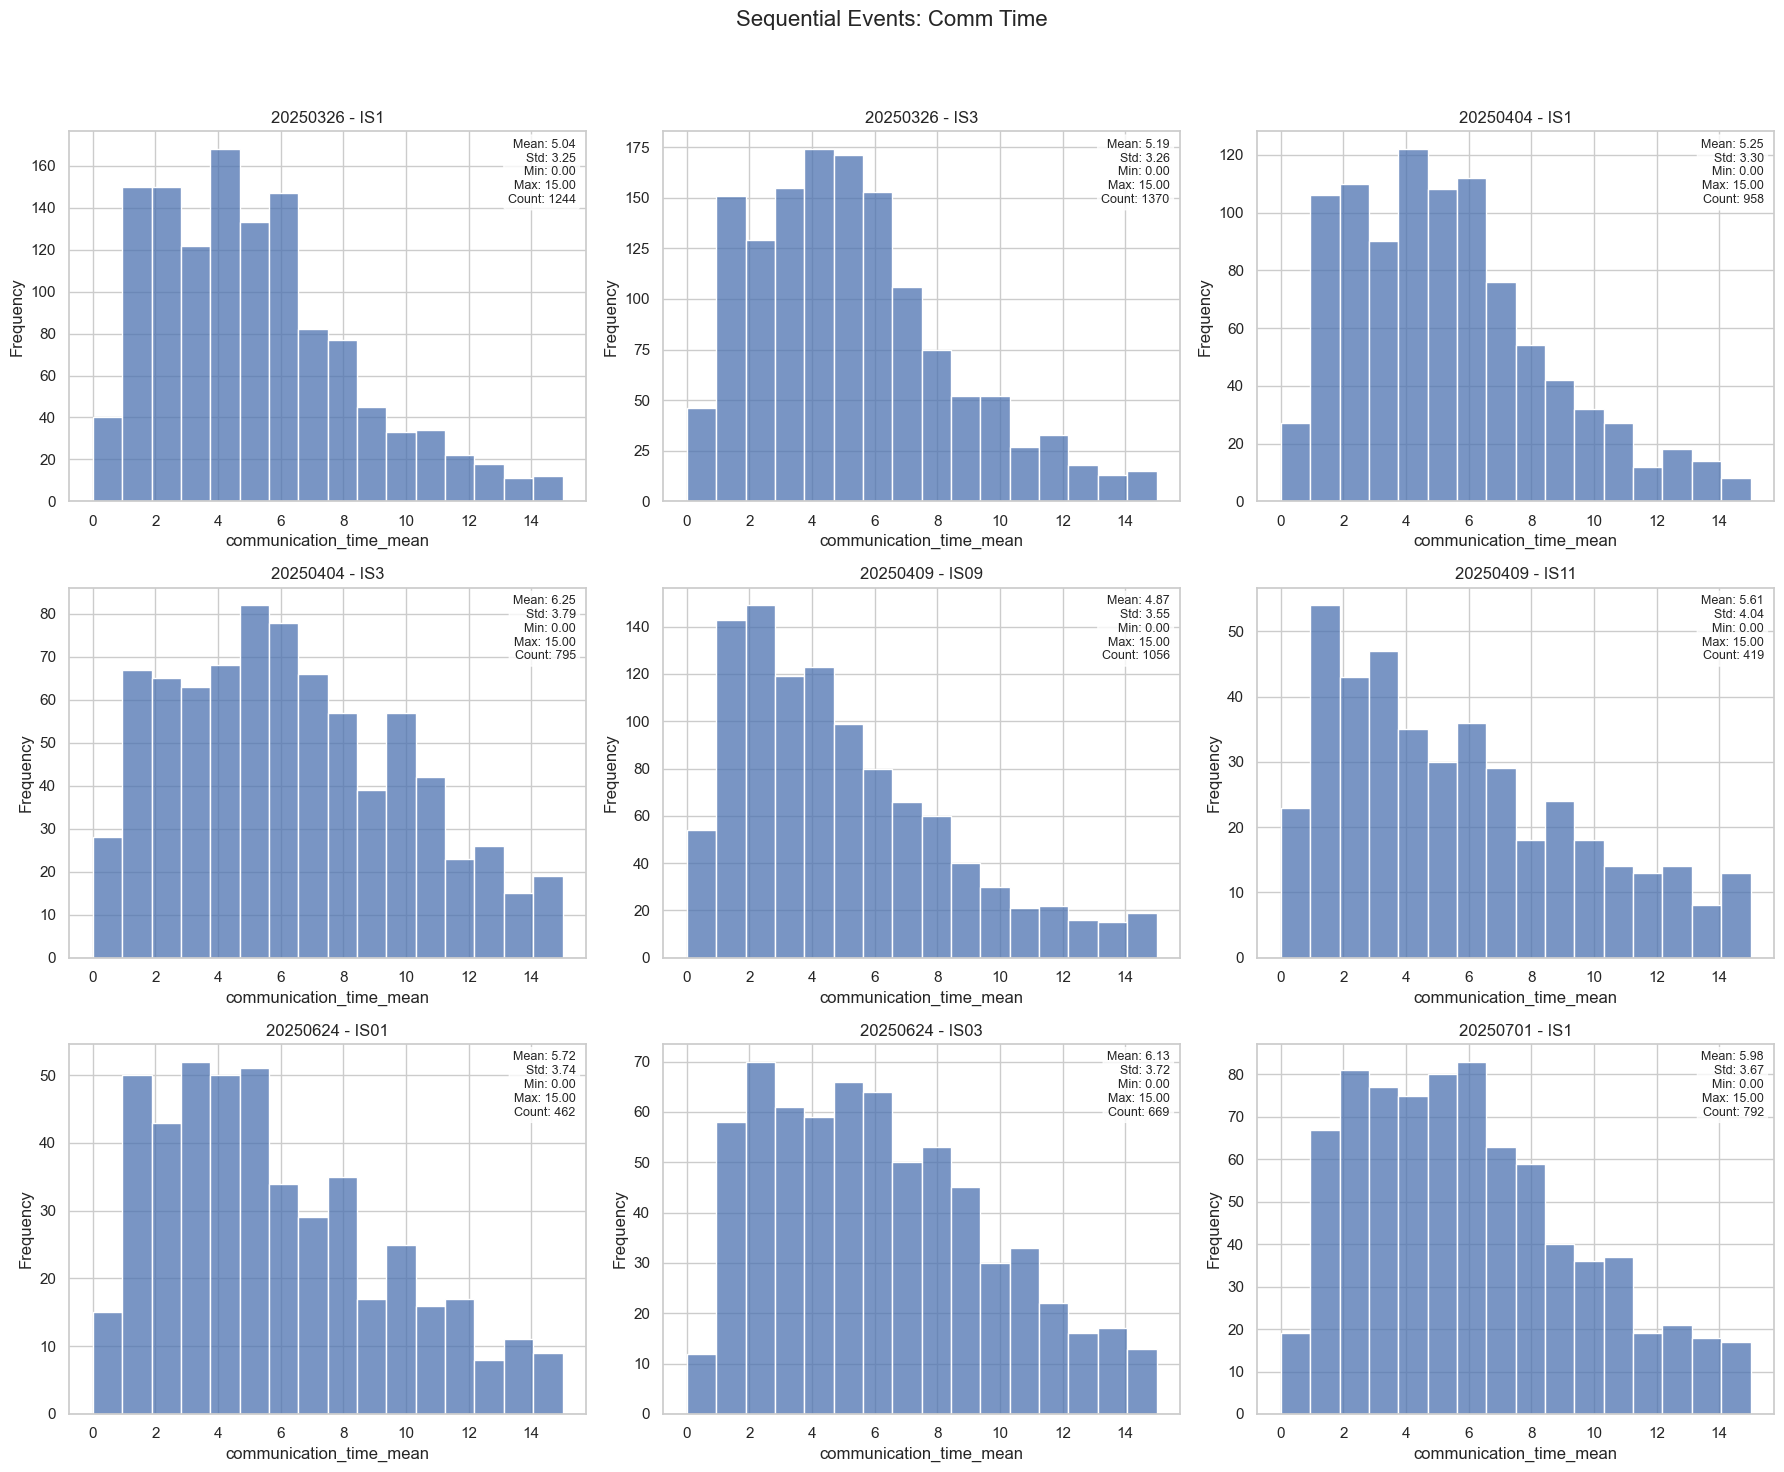

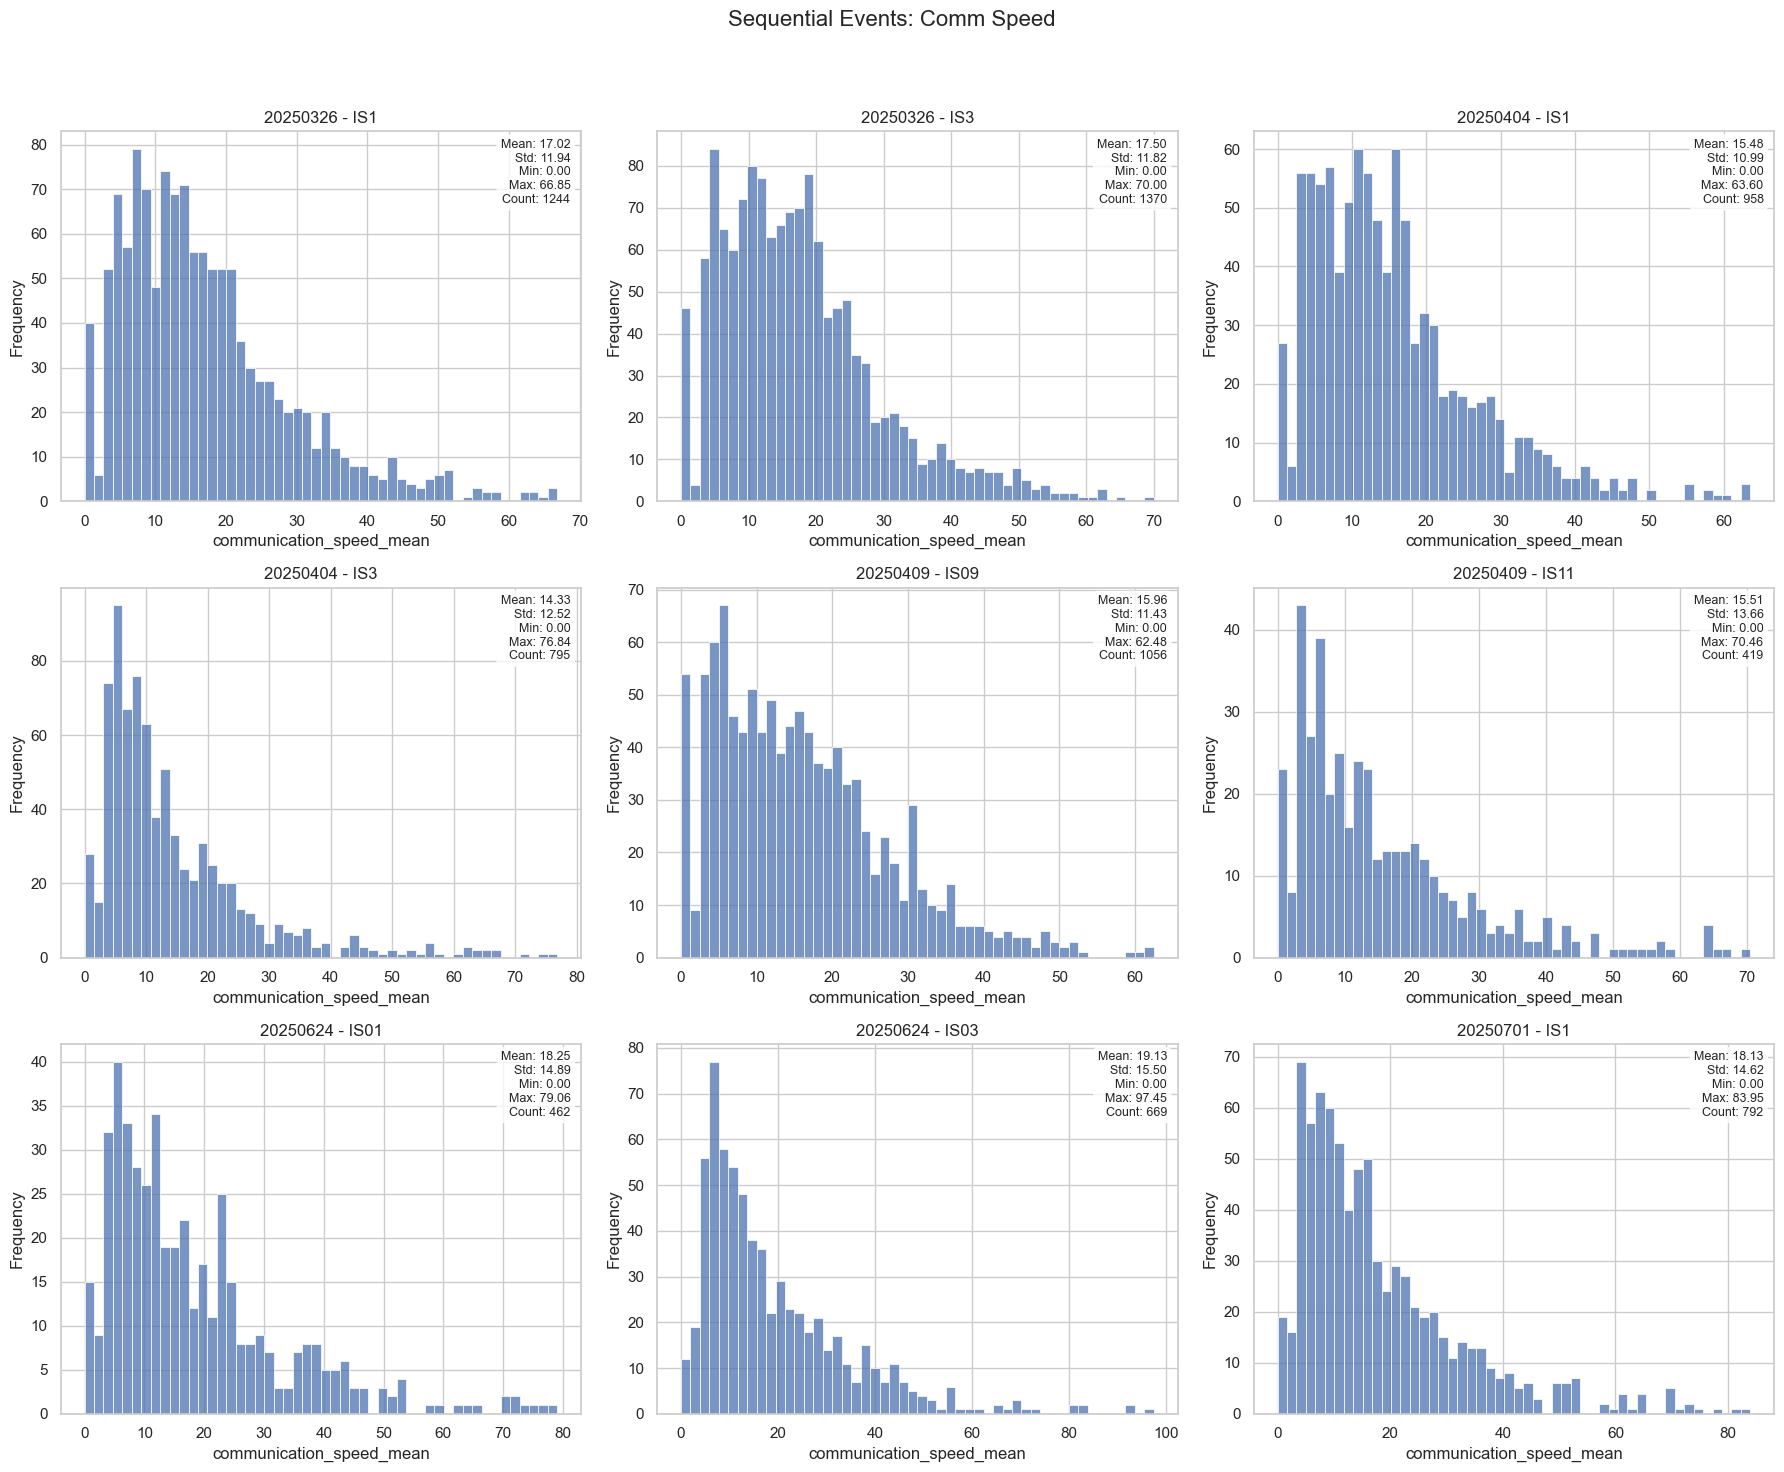

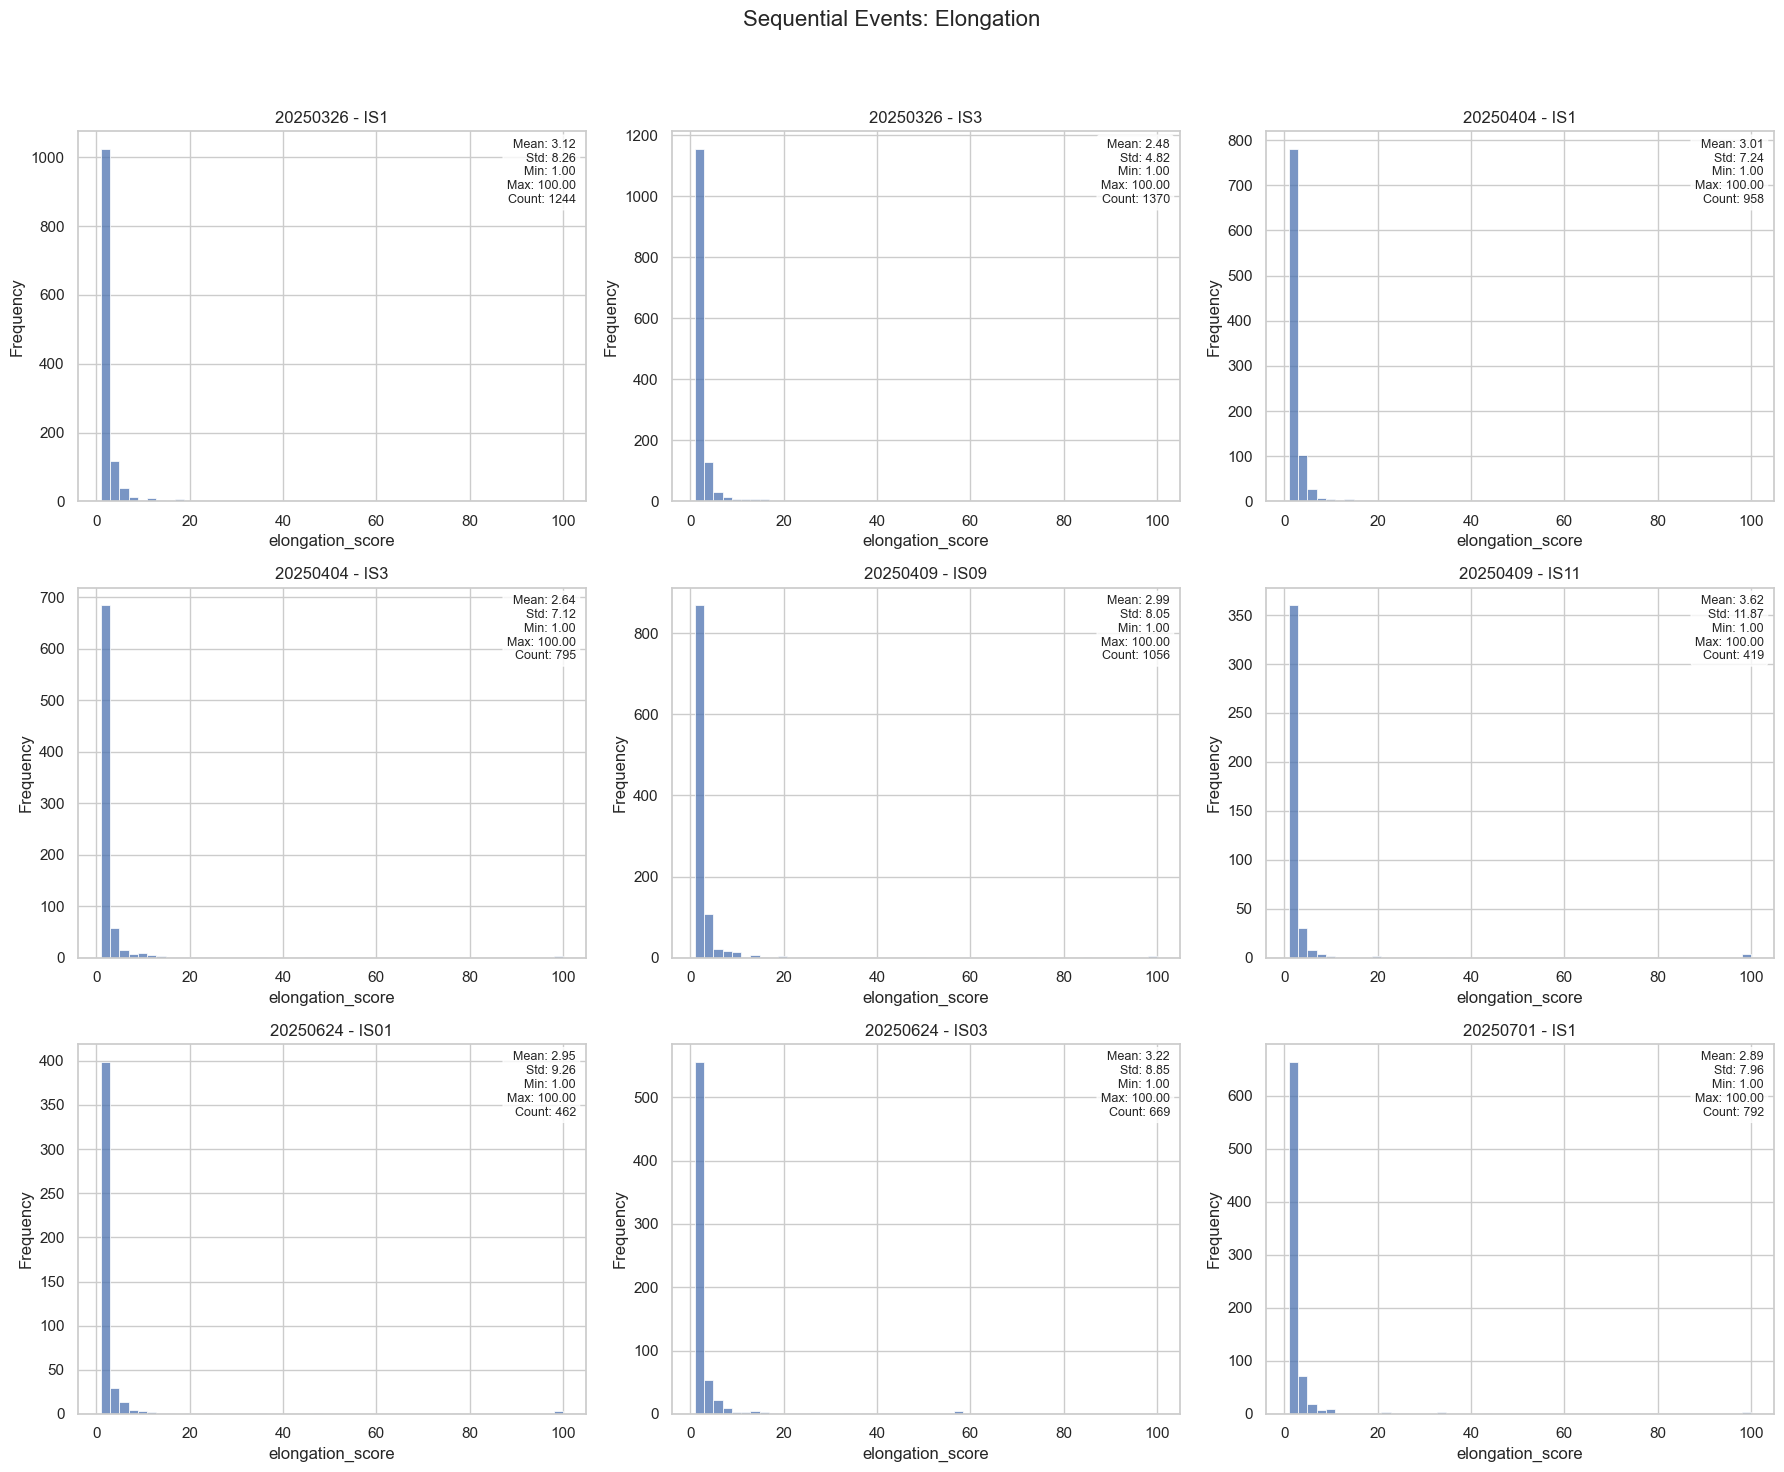

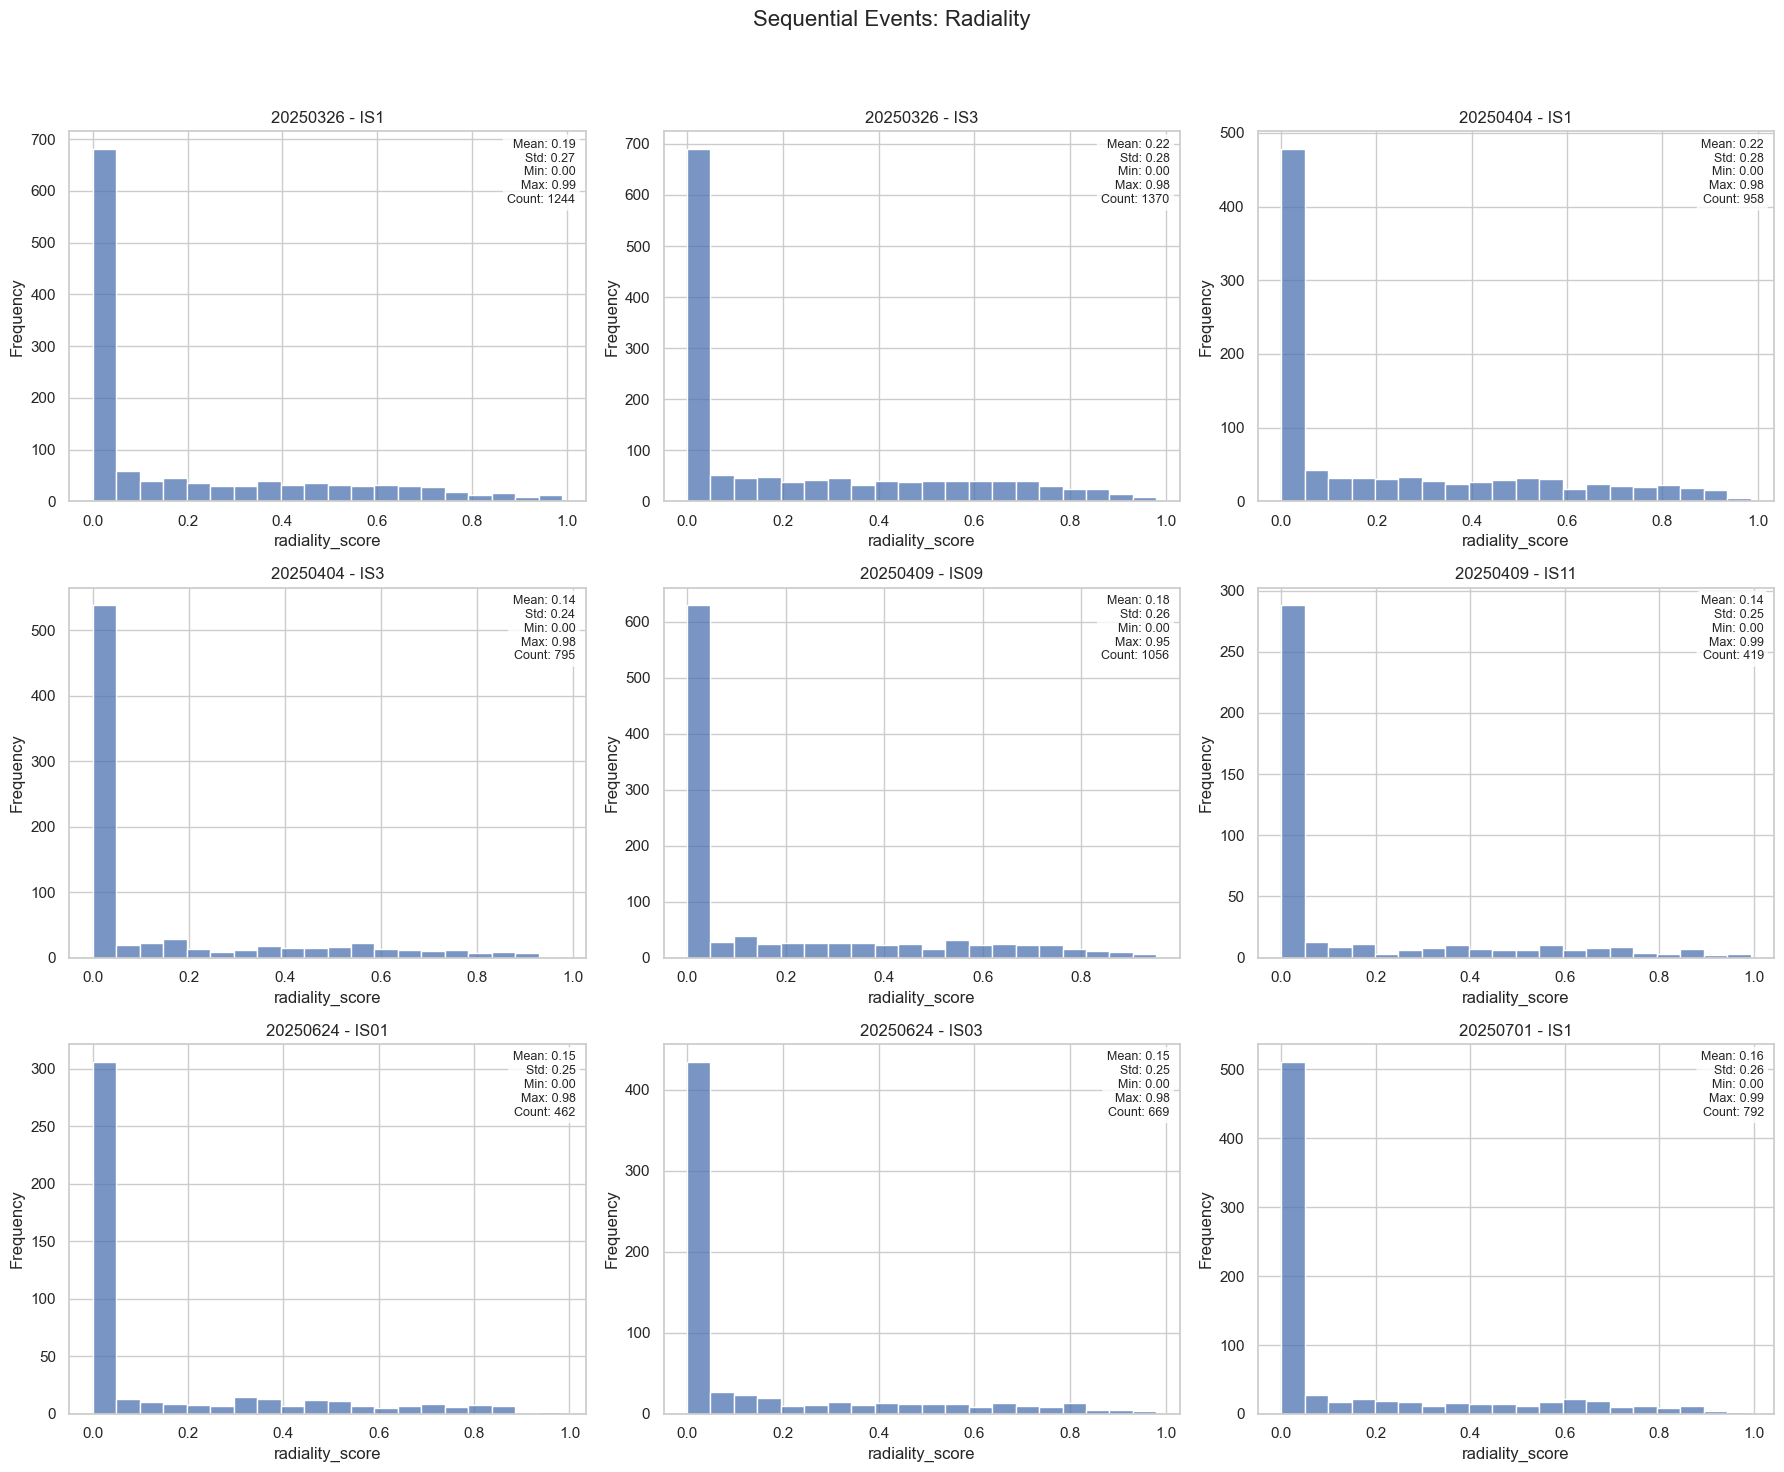

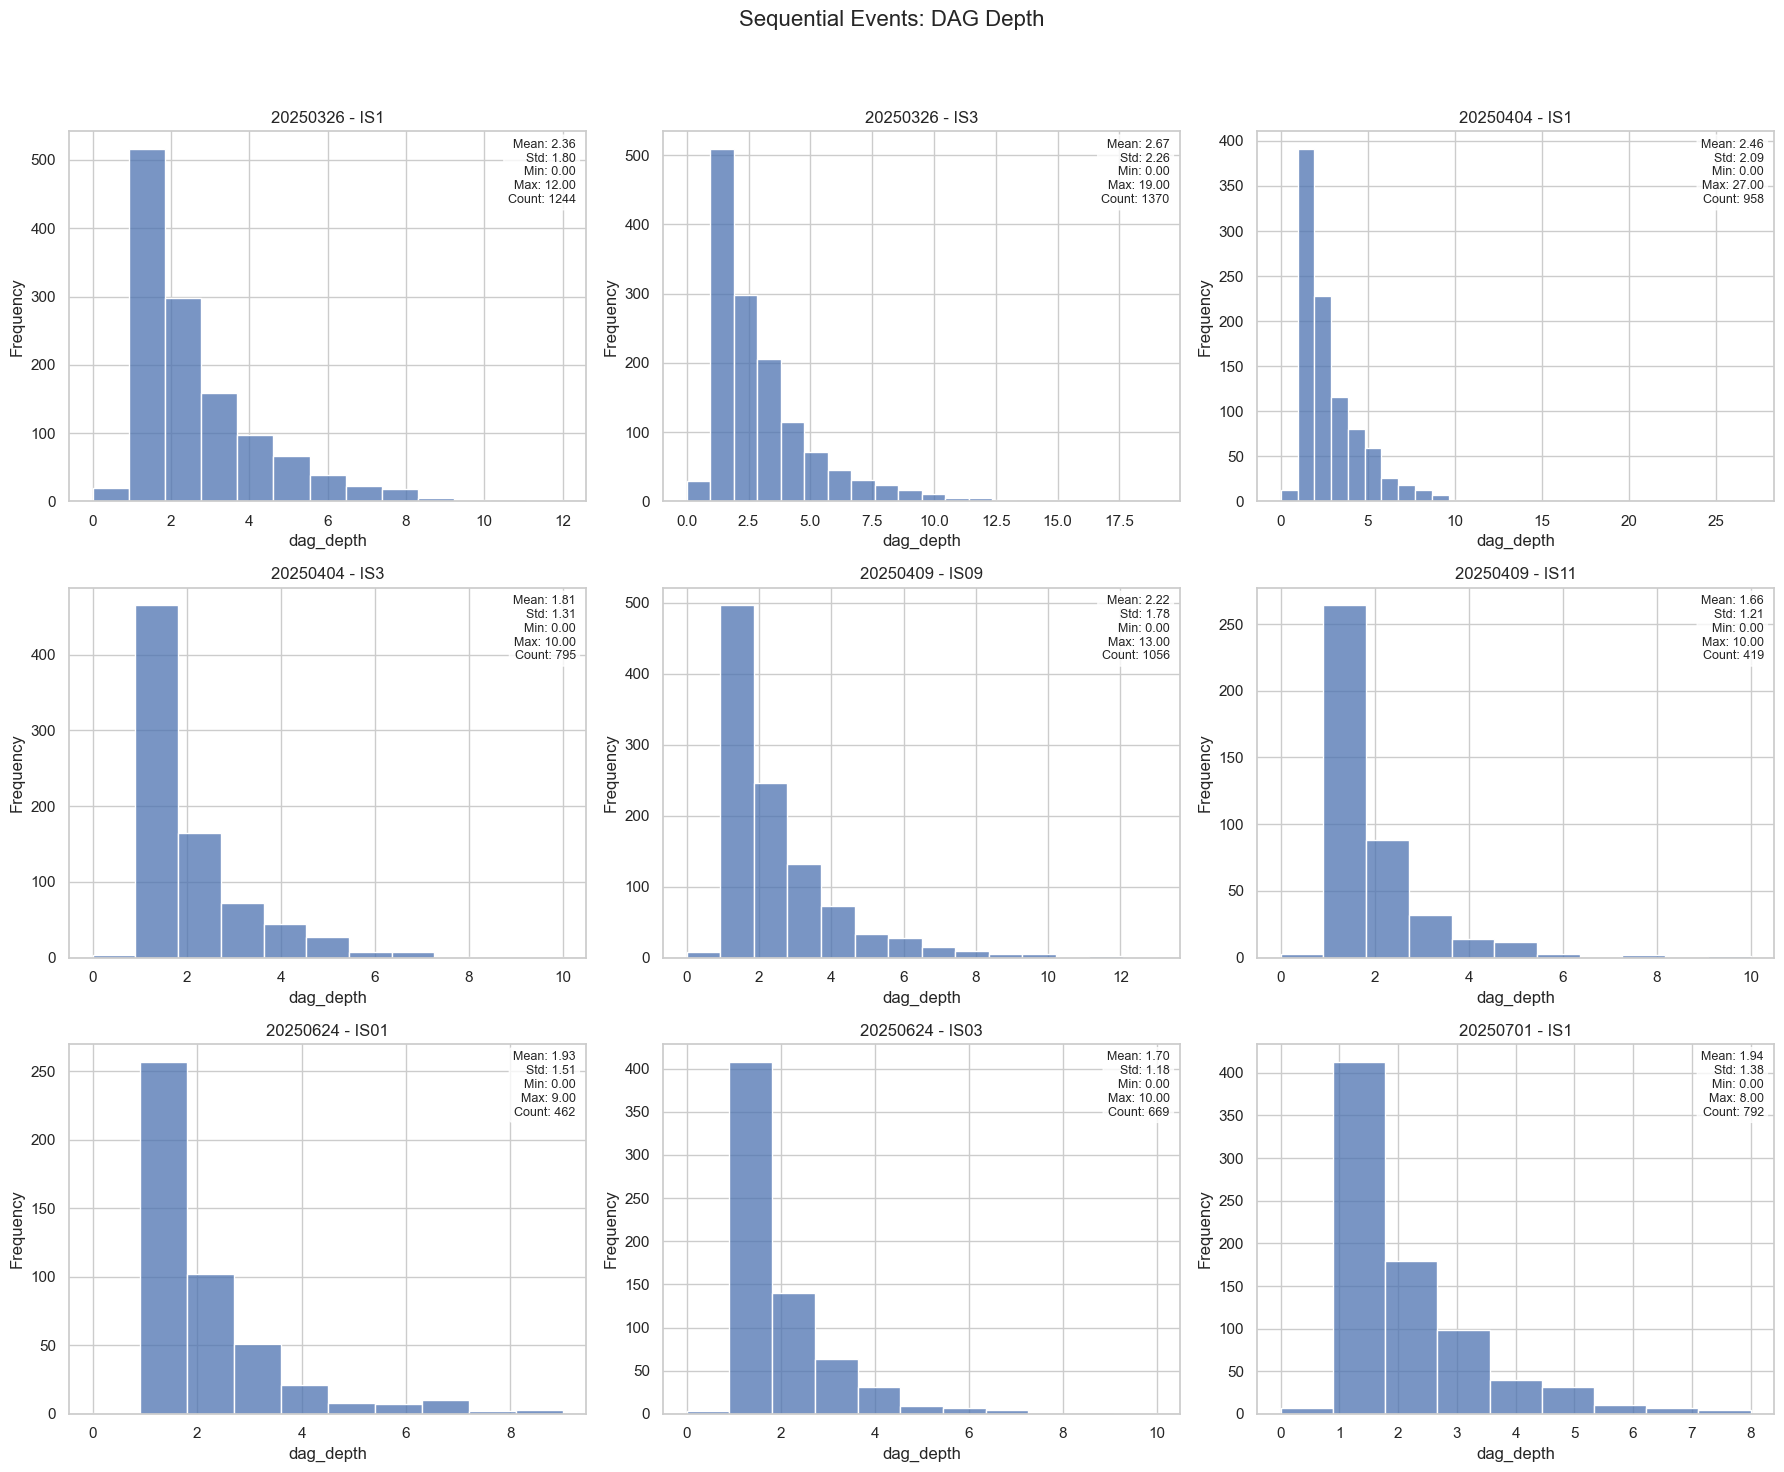

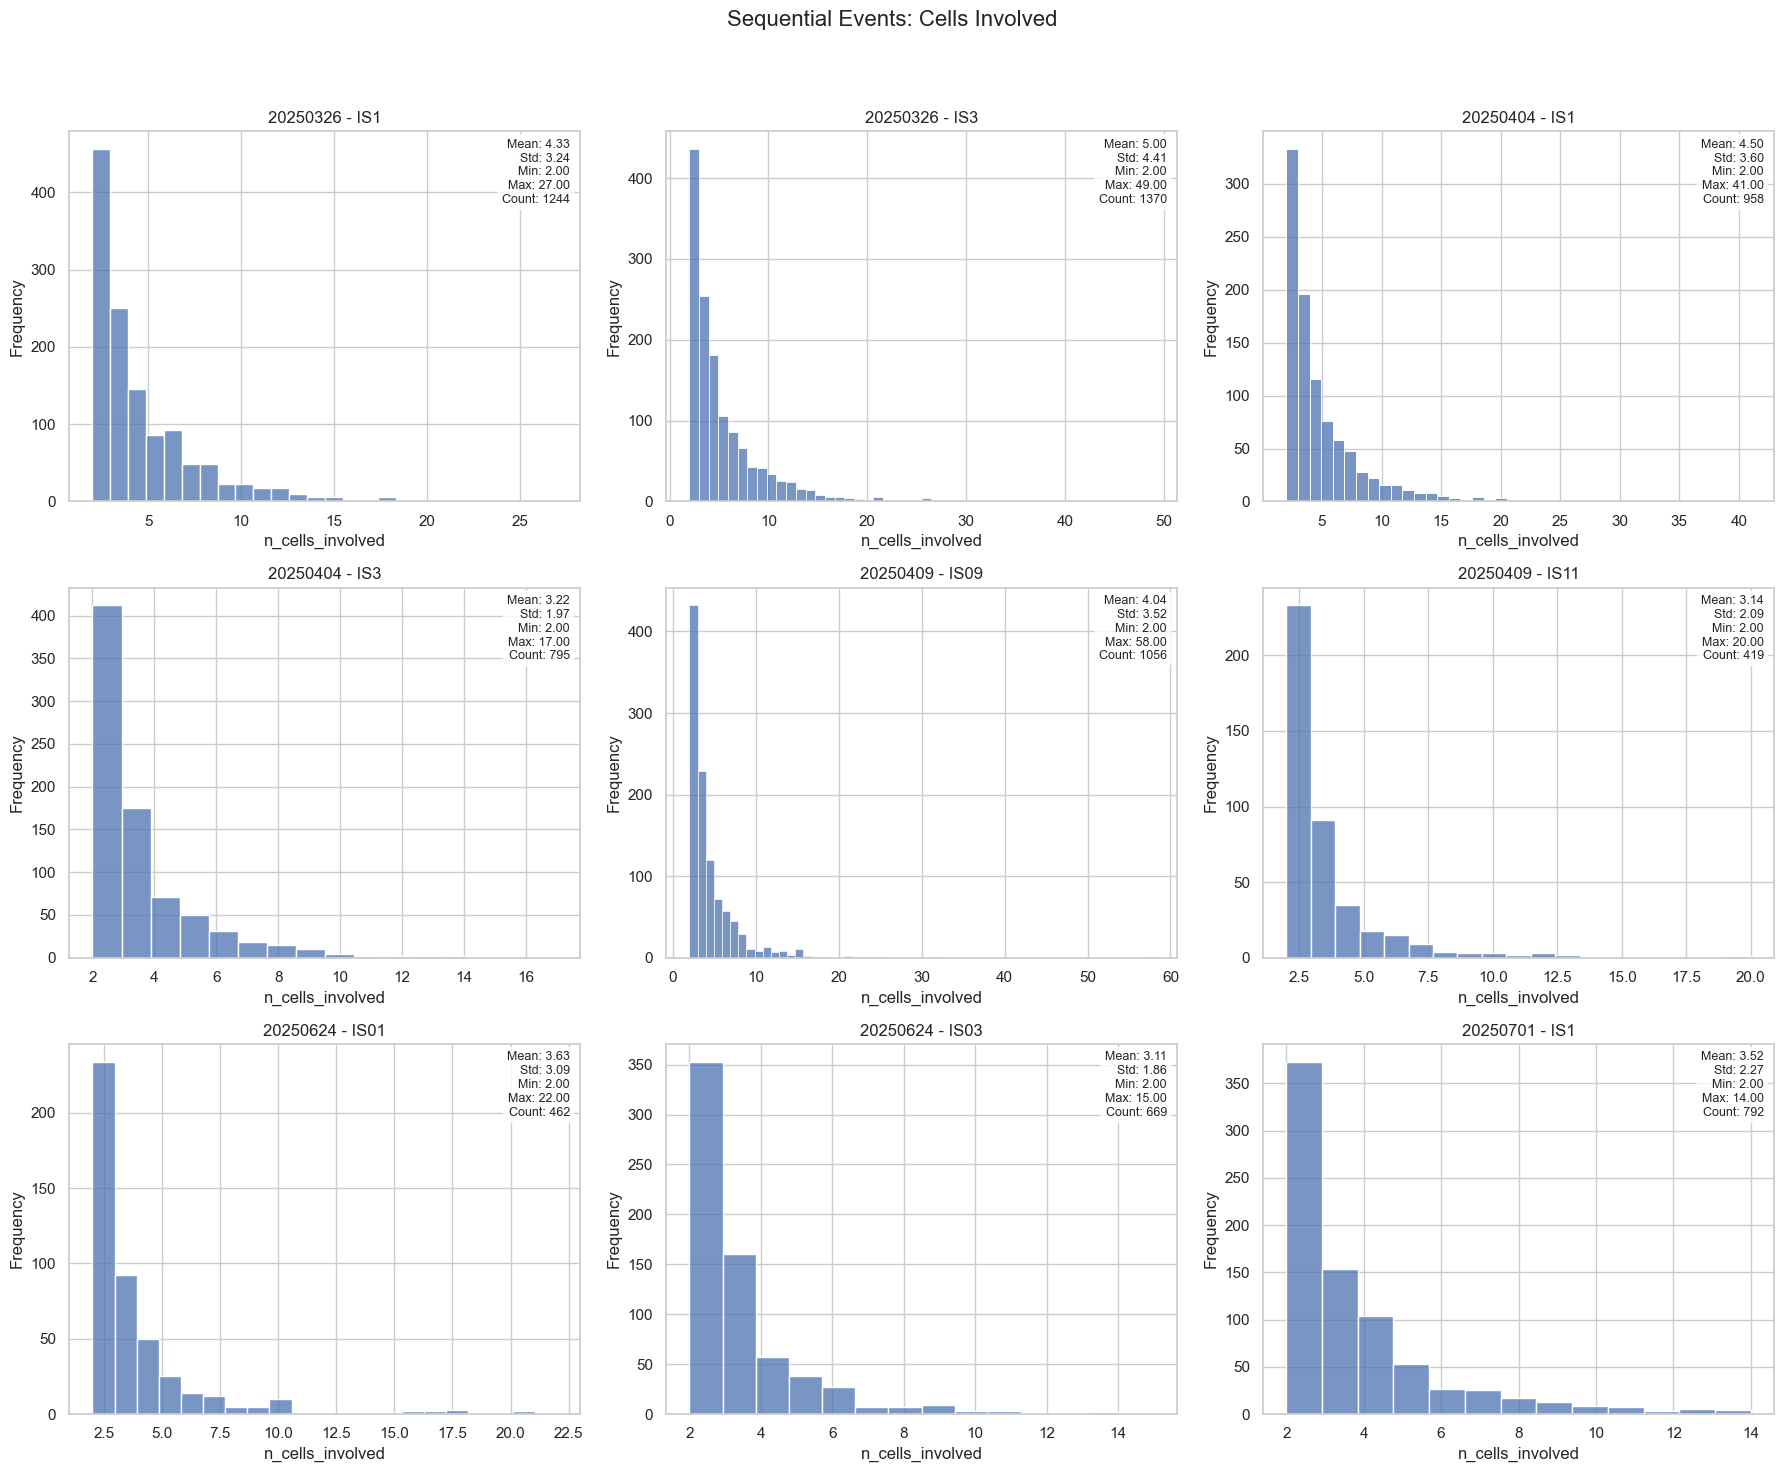

In [11]:
seq_events = events[events["event_type"] == "SequentialEvent"]
plot_histogram_by_dataset(seq_events, "communication_time_mean", "Sequential Events: Comm Time", bin_width=1, n_cols=3)
plot_histogram_by_dataset(seq_events, "communication_speed_mean", "Sequential Events: Comm Speed", bin_count=50, n_cols=3)
plot_histogram_by_dataset(seq_events, "elongation_score", "Sequential Events: Elongation", bin_count=50, n_cols=3)
plot_histogram_by_dataset(seq_events, "radiality_score", "Sequential Events: Radiality", bin_width=0.05, n_cols=3)
plot_histogram_by_dataset(seq_events, "dag_depth", "Sequential Events: DAG Depth", bin_width=1, n_cols=3)
plot_histogram_by_dataset(seq_events, "n_cells_involved", "Sequential Events: Cells Involved", bin_width=1, n_cols=3)

## 📌 Conclusion & Next Steps

### 🔍 Summary of Observations
- **Visual Patterns:** Briefly describe observed visual trends (raster plots, activity levels, etc.).
- **Statistical Results:** Mention key metrics or KS-test outcomes that stood out.

### 📉 Dataset Reproducibility
- Which datasets appear consistent or divergent?
- Are any replicates potentially faulty or biologically distinct?

### 🧪 Actionable Decisions
- [ ] Exclude dataset(s) due to technical issues
- [ ] Flag dataset(s) for further inspection
- [ ] Select representative samples for downstream analysis

### 📂 Planned Deep-Dive
- Which direction will the next notebook take? (e.g., spatial clustering, propagation analysis, signal decomposition)

---